## 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## 한글 설정

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [6]:
%config InlineBackend.figure_format = 'retina'

## 자료 불러오기

In [7]:
df = pd.read_csv('/content/drive/MyDrive/basic.csv')

## 주가 불러오기 위해 설치 및 실행

In [8]:
pip install pandas_datareader

In [9]:
import pandas_datareader.data as web
import datetime

In [10]:
pip install --upgrade pandas

In [11]:
pip install --upgrade pandas-datareader

## 간단한 코드로 주가를 가져올 수 있어요

---



In [12]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2020, 12, 31)

nc_soft = web.DataReader("036570.KS", "yahoo", start=start, end=end)

## 데이터의 인덱스를 시계열로 변경해줍시다 !!

In [13]:
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.T.index

Index(['20111231', '20121231', '20131231', '20141231', '20151231', '20161231',
       '20171231', '20181231', '20191231', '20201231'],
      dtype='object')

In [16]:
df = df.T

In [17]:
df.index = pd.to_datetime(df.index)

## 그려봅시다!!!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31859f2f90>,
      dtype=object)

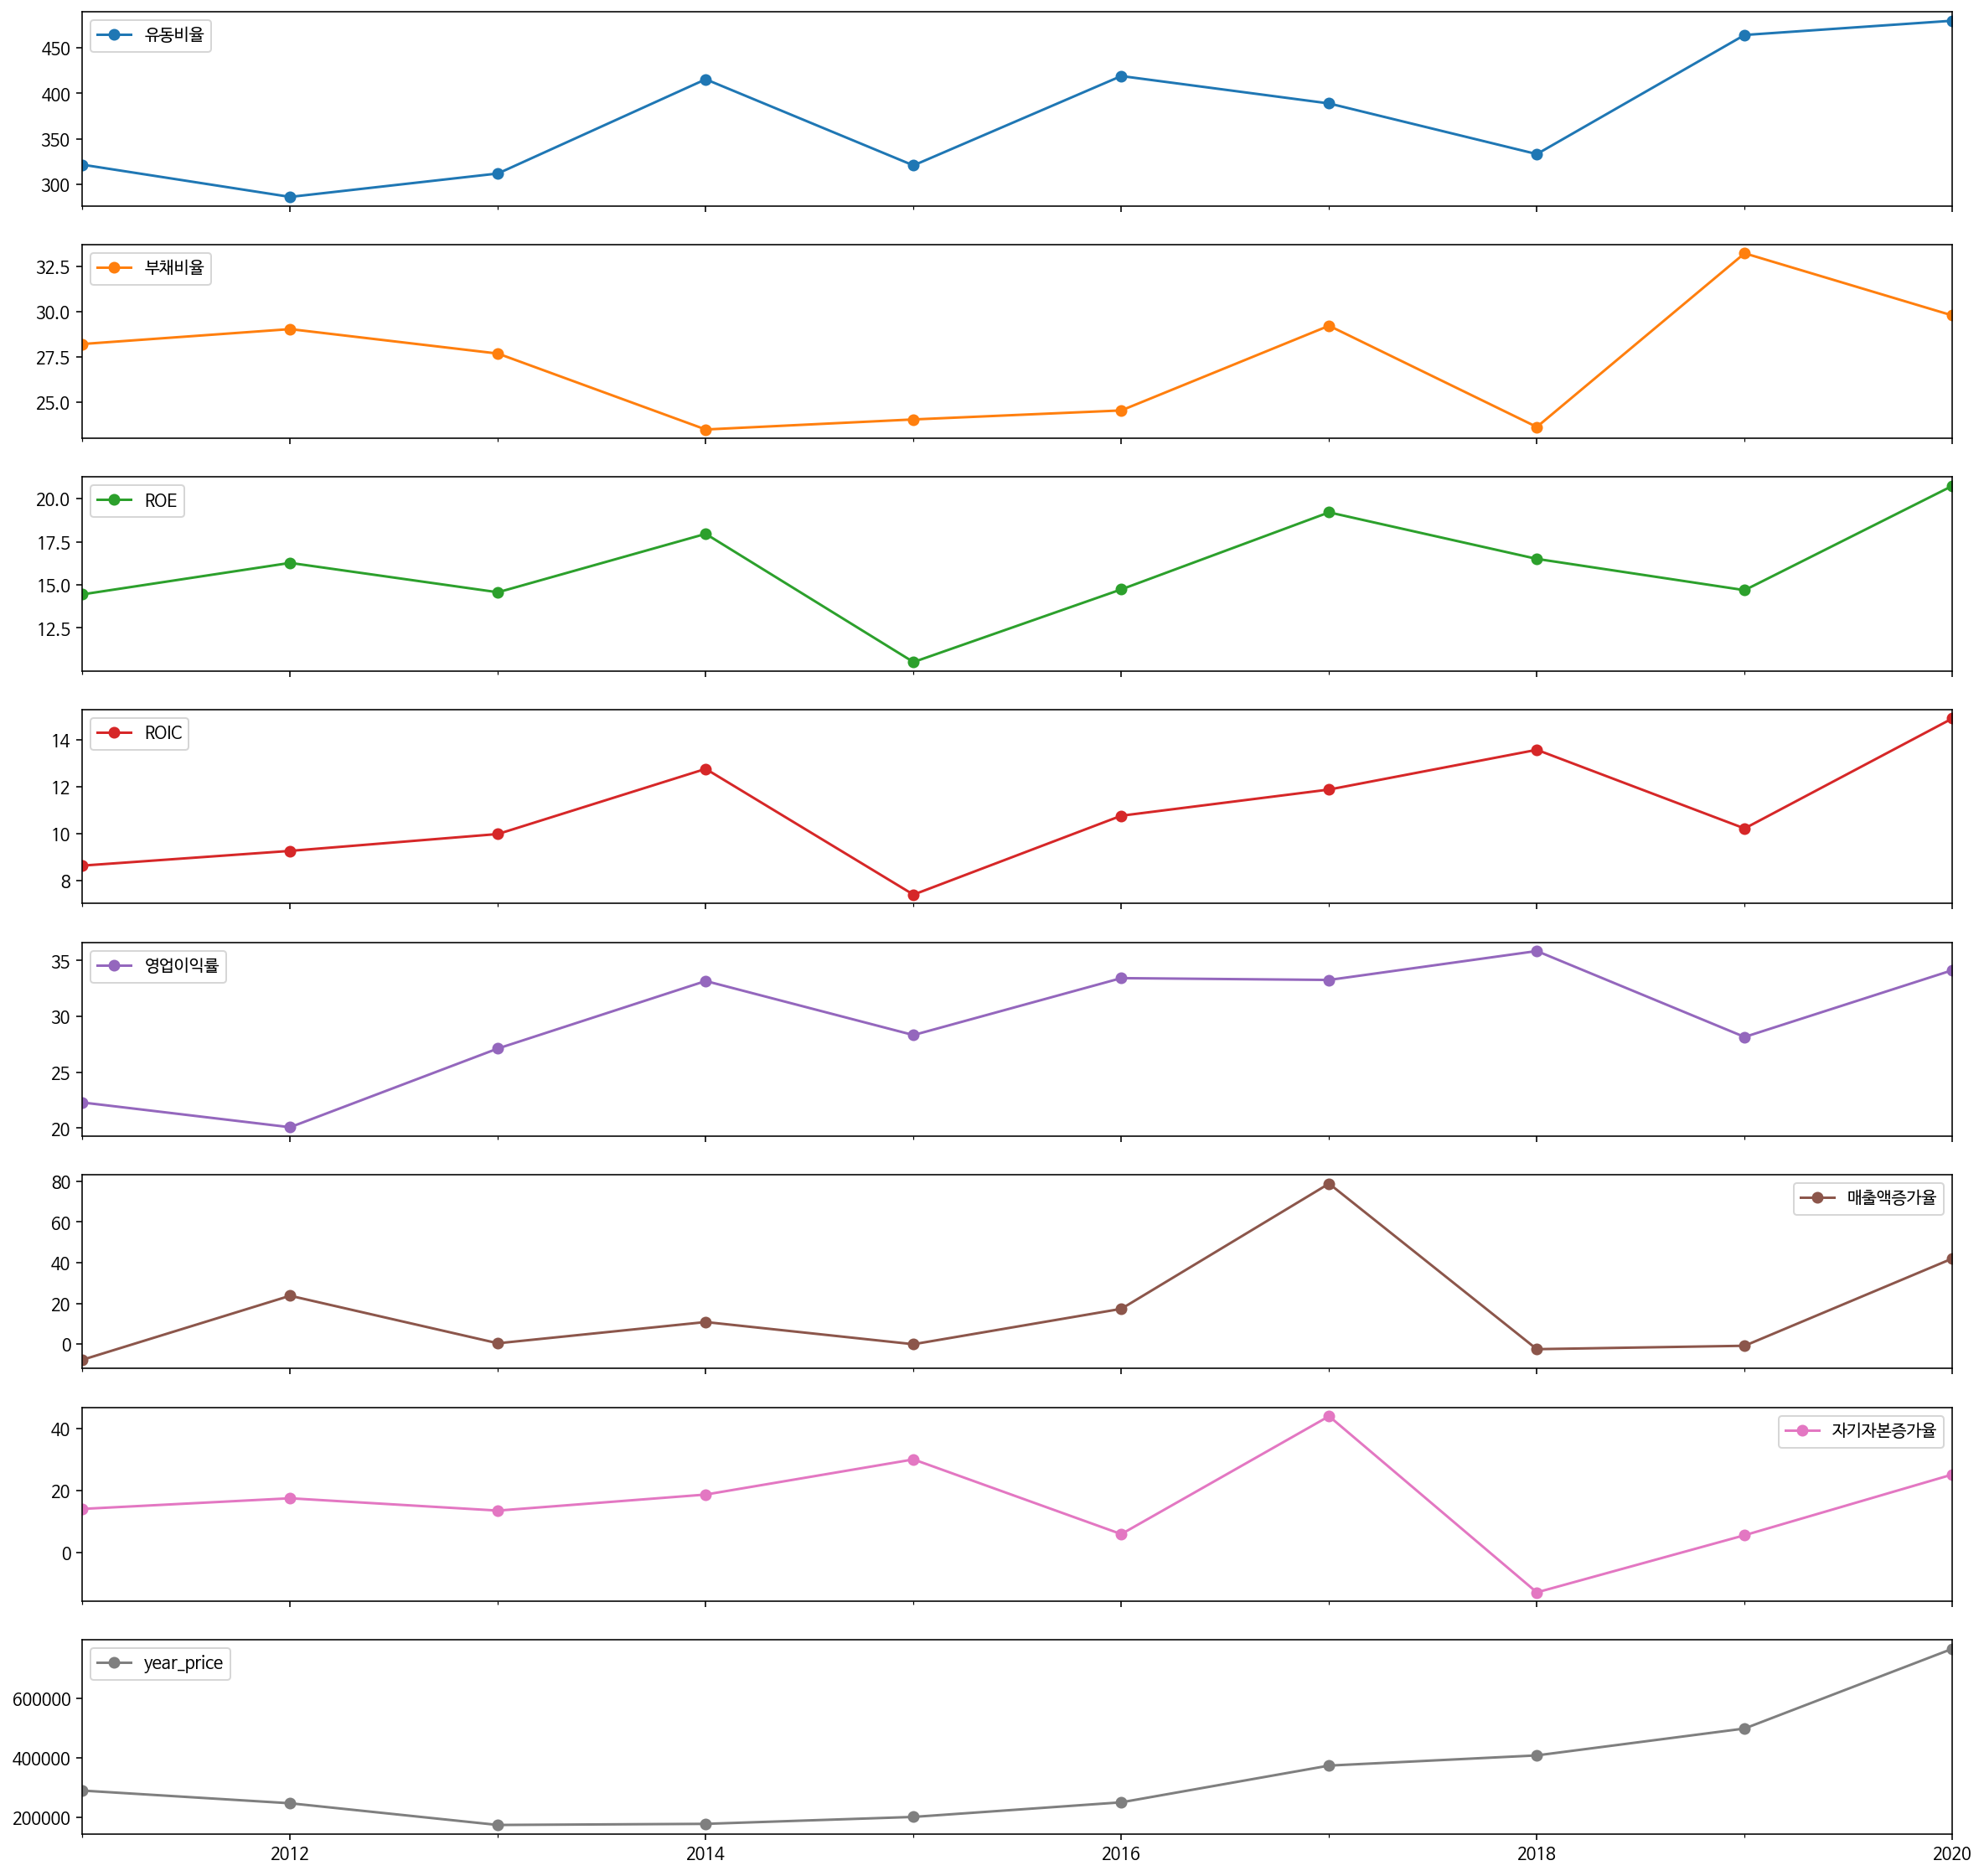

In [62]:
df.plot(subplots=True, figsize=(20, 20), marker='o')

## 주가도 그려봅시다!!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f31908c6d50>],
      dtype=object)

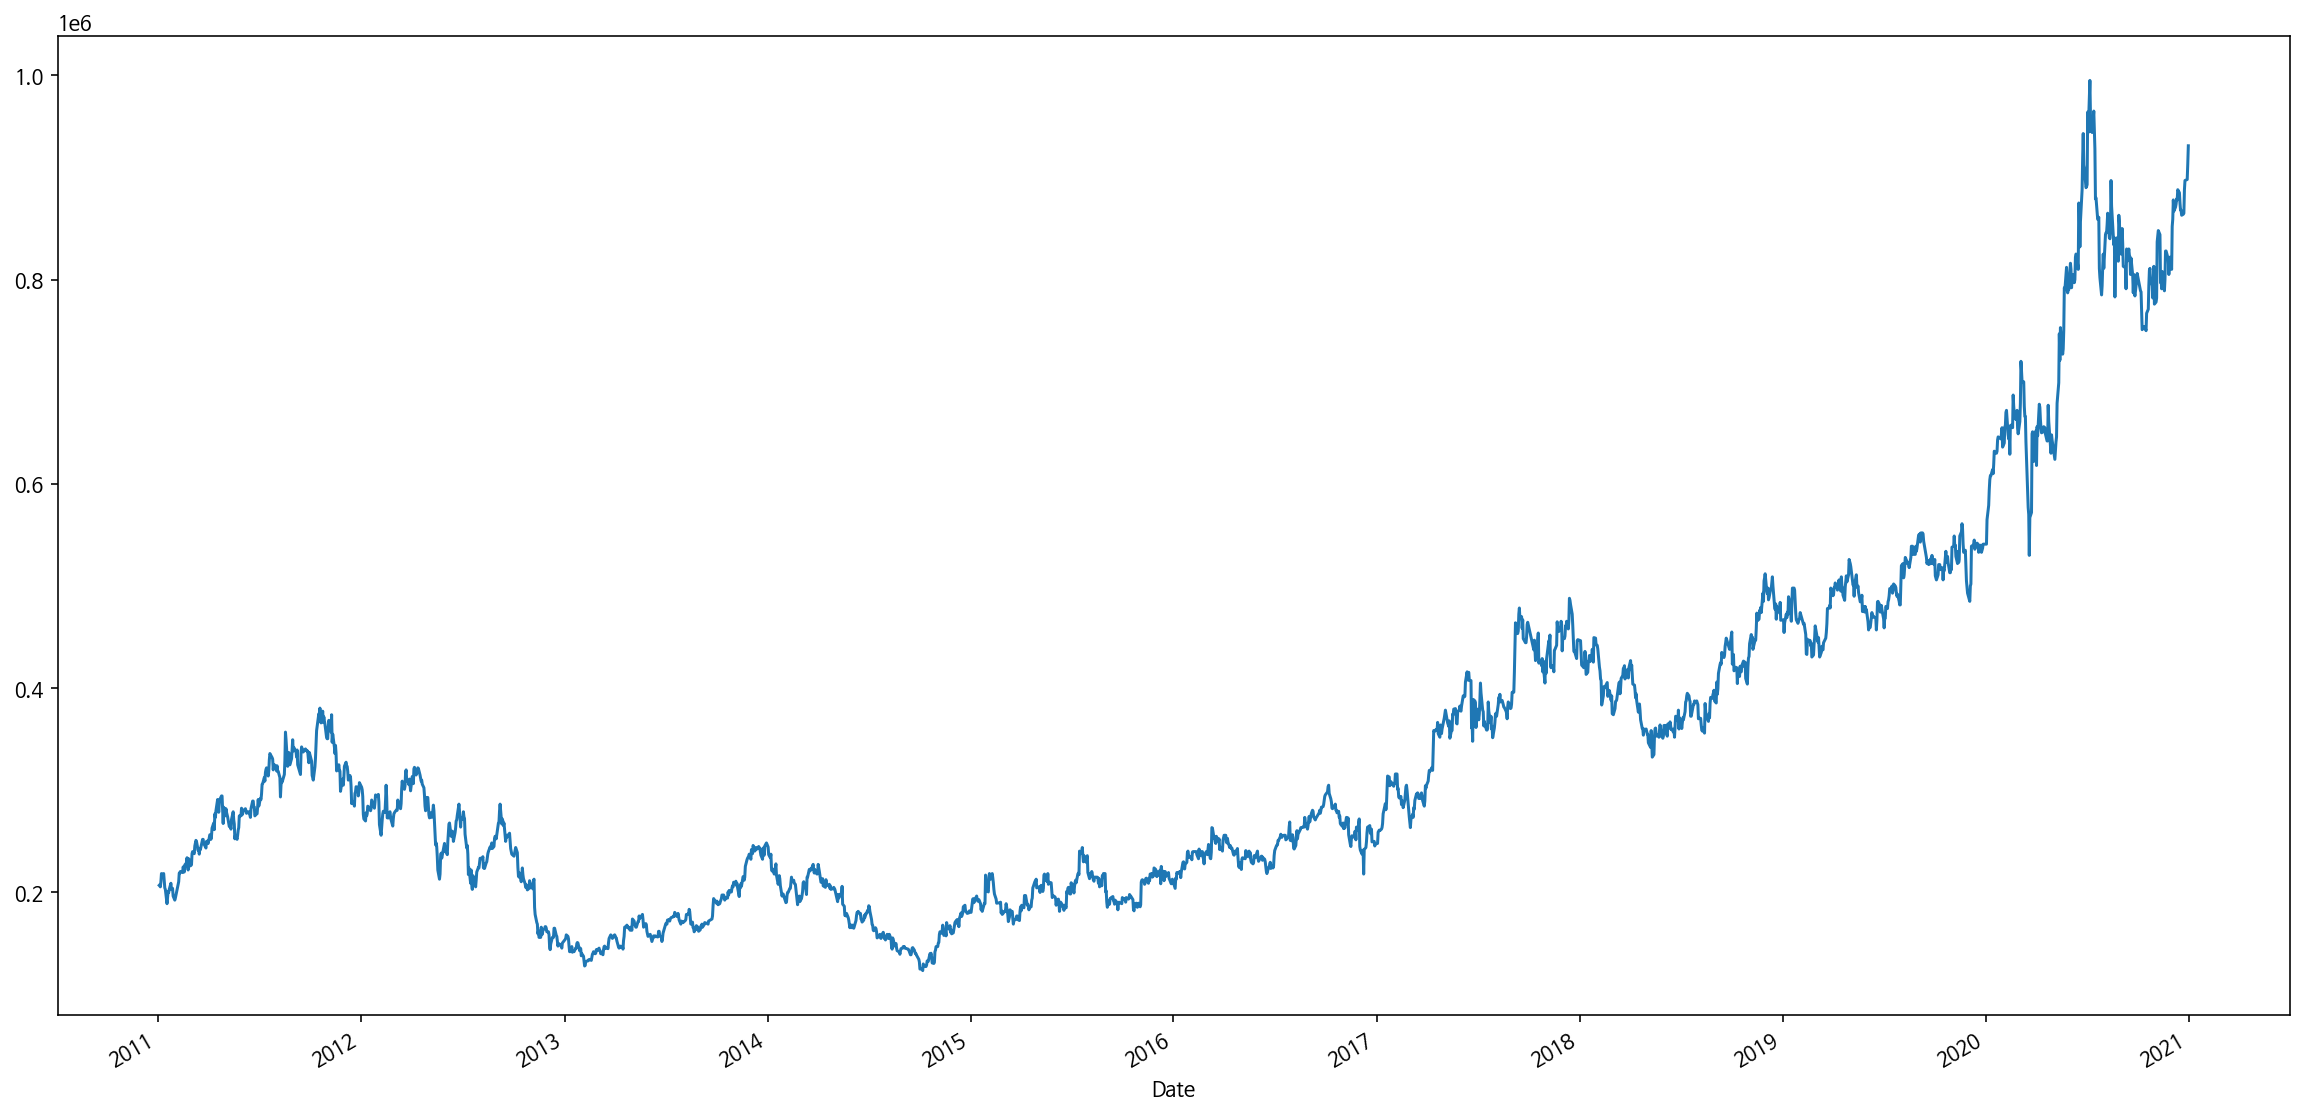

In [19]:
nc_soft['Close'].plot(subplots=True, figsize=(20, 10))

## 엔씨소프트의 지표들과 주가를 그려봤지만 모르겠음!!!

## 다른걸 한 번 해봅시다 !!

In [20]:
df

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율
2011-12-31,321.604623,28.207079,14.441248,8.638847,22.290566,-7.699800,14.082674
2012-12-31,286.143240,29.029297,16.269405,9.265590,20.072731,23.755420,17.513699
2013-12-31,311.899665,27.681109,14.563743,9.983536,27.123991,0.416130,13.541500
2014-12-31,415.485748,23.497585,17.954789,12.755768,33.168245,10.845429,18.712316
2015-12-31,320.782615,24.051292,10.513438,7.403896,28.327217,-0.050148,30.048145
2016-12-31,419.062707,24.547252,14.731229,10.762070,33.425872,17.327888,5.957315
2017-12-31,388.928534,29.214289,19.202914,11.876118,33.263873,78.812407,43.984600
2018-12-31,333.226330,23.636573,16.501577,13.567128,35.853522,-2.479427,-12.833902
2019-12-31,464.212748,33.206888,14.685940,10.219815,28.156391,-0.812195,5.598807
2020-12-31,479.905718,29.781075,20.739893,14.901217,34.136210,42.029445,25.178350


## 주가를 1년 단위로 평균내서 그냥 합쳐볼게요

In [21]:
temp = []
for i in range(2011, 2021):
    k = nc_soft[f'{i}']['Close'].mean()
    temp.append(round(k))

In [22]:
temp

[289623,
 246950,
 174012,
 177735,
 201044,
 250083,
 373577,
 407834,
 498195,
 766214]

In [23]:
df['year_price'] = temp

In [24]:
df

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율,year_price
2011-12-31,321.604623,28.207079,14.441248,8.638847,22.290566,-7.699800,14.082674,289623
2012-12-31,286.143240,29.029297,16.269405,9.265590,20.072731,23.755420,17.513699,246950
2013-12-31,311.899665,27.681109,14.563743,9.983536,27.123991,0.416130,13.541500,174012
2014-12-31,415.485748,23.497585,17.954789,12.755768,33.168245,10.845429,18.712316,177735
2015-12-31,320.782615,24.051292,10.513438,7.403896,28.327217,-0.050148,30.048145,201044
2016-12-31,419.062707,24.547252,14.731229,10.762070,33.425872,17.327888,5.957315,250083
2017-12-31,388.928534,29.214289,19.202914,11.876118,33.263873,78.812407,43.984600,373577
2018-12-31,333.226330,23.636573,16.501577,13.567128,35.853522,-2.479427,-12.833902,407834
2019-12-31,464.212748,33.206888,14.685940,10.219815,28.156391,-0.812195,5.598807,498195
2020-12-31,479.905718,29.781075,20.739893,14.901217,34.136210,42.029445,25.178350,766214


## 연 평균 주가도 붙여줬으니 다른것도 그려봅시다 !!

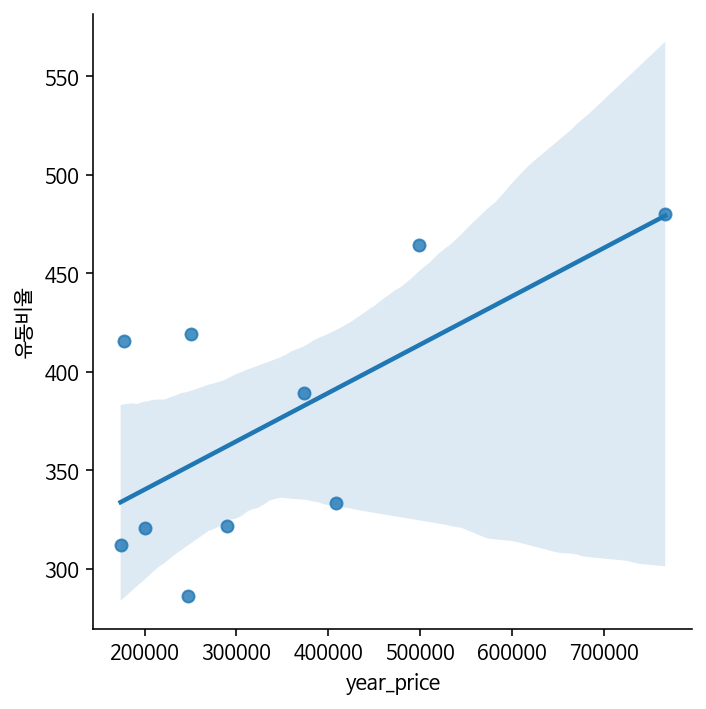

In [25]:
sns.lmplot(x='year_price', y='유동비율', data=df)

## 뭔가 우상향하는것 같기는 한데...
## 그냥 거의 이런식은 아닐까?

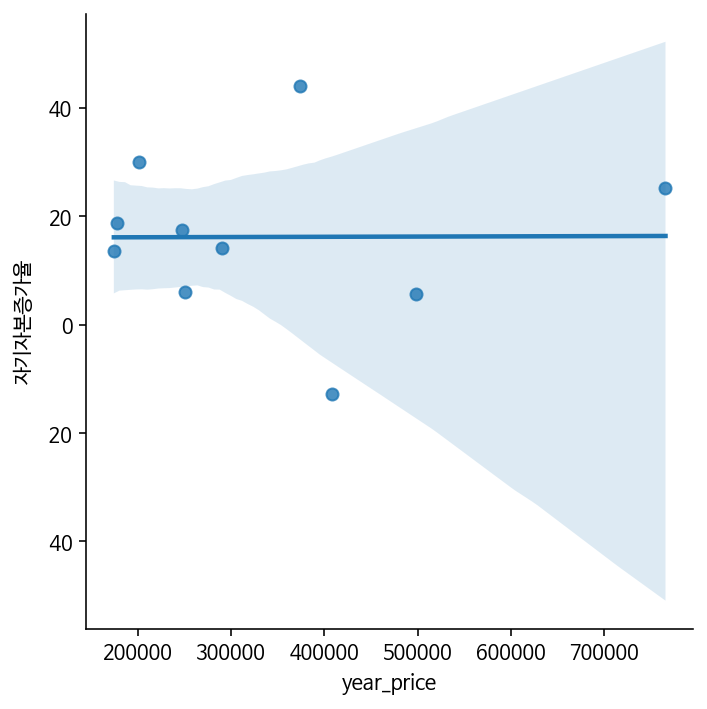

In [26]:
sns.lmplot(x='year_price', y='자기자본증가율', data=df)

## 꼭 그렇지는 않네요

## 상관관계를 좀 알아봅시다 !!

In [27]:
corr = df.corr()
corr

Date,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율,year_price
Date,,,,,,,,
유동비율,1.000000,0.321184,0.492273,0.588299,0.583769,0.314209,0.069696,0.660618
부채비율,0.321184,1.000000,0.245696,-0.037249,-0.368389,0.266372,0.205583,0.531136
ROE,0.492273,0.245696,1.000000,0.855871,0.433090,0.686992,0.201488,0.587334
ROIC,0.588299,-0.037249,0.855871,1.000000,0.756224,0.409870,-0.137965,0.629061
영업이익률,0.583769,-0.368389,0.433090,0.756224,1.000000,0.315056,-0.084380,0.360057
매출액증가율,0.314209,0.266372,0.686992,0.409870,0.315056,1.000000,0.690850,0.346440
자기자본증가율,0.069696,0.205583,0.201488,-0.137965,-0.084380,0.690850,1.000000,0.005011
year_price,0.660618,0.531136,0.587334,0.629061,0.360057,0.346440,0.005011,1.000000


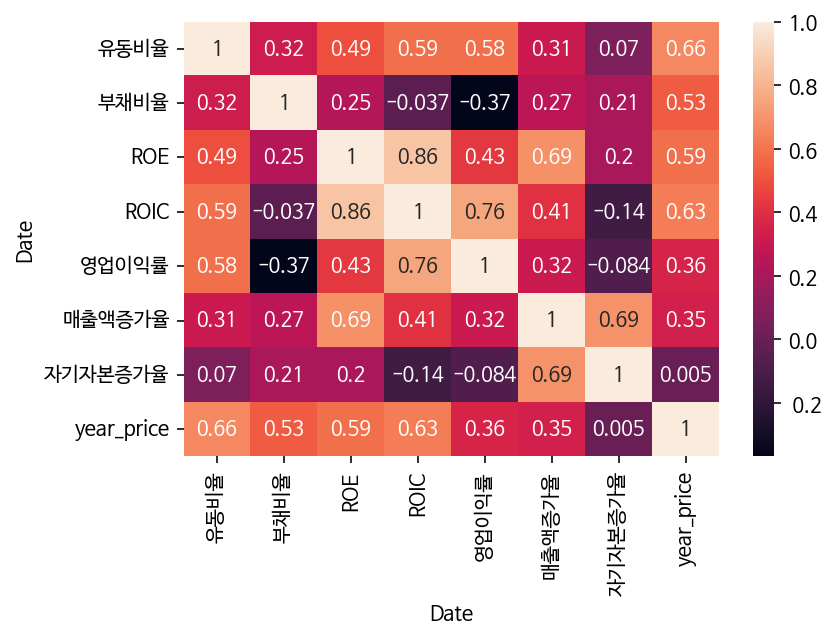

In [28]:

sns.heatmap(corr, annot=True)

## 유동비율과 ROIC가 주가와 가장 연관이 있나 보네요

## 같이 그려서 한 번 보도록 하죠

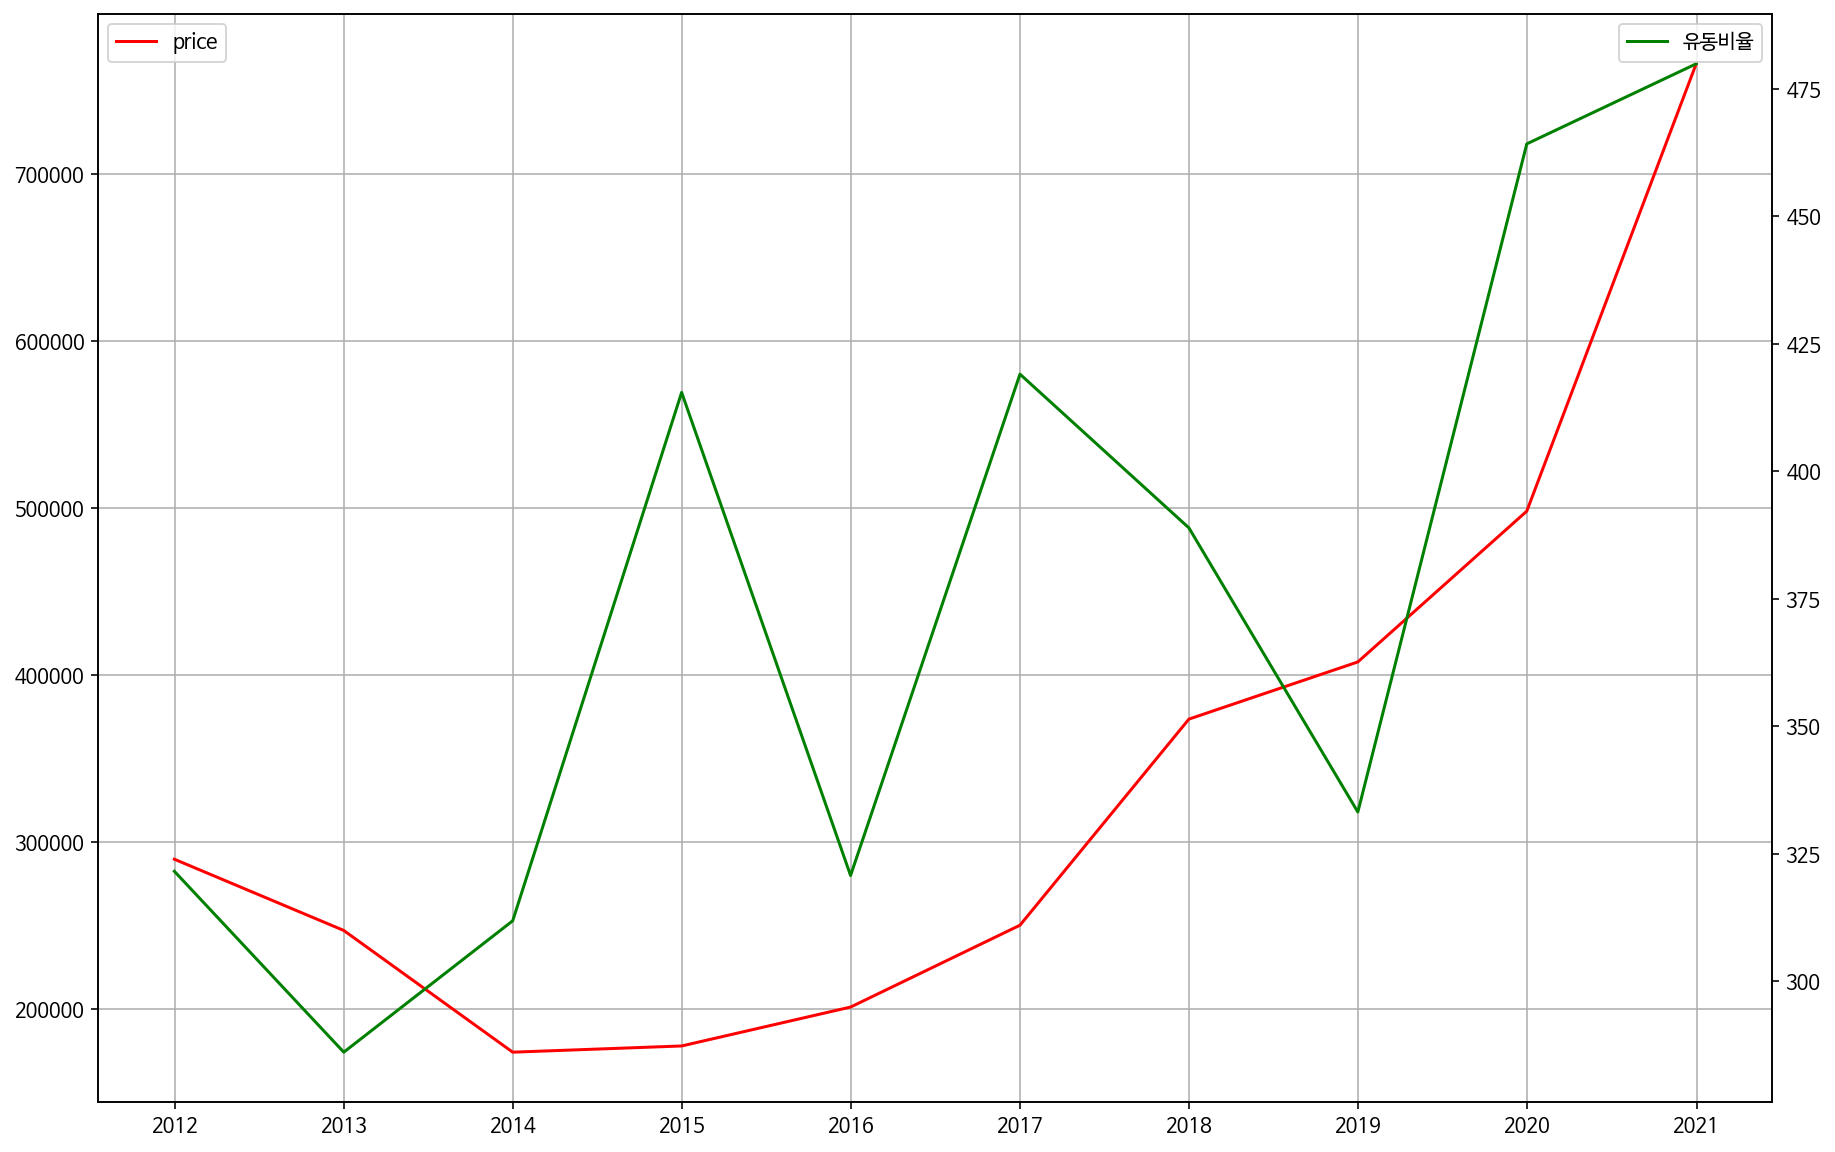

In [29]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
line1 = ax1.plot(df.index, df['year_price'], color = 'r', label='price')
line2 = ax2.plot(df.index, df['유동비율'], color = 'g', label='유동비율')


ax1.legend(loc = 2)
ax1.grid()
ax2.legend(loc = 1)
plt.show()


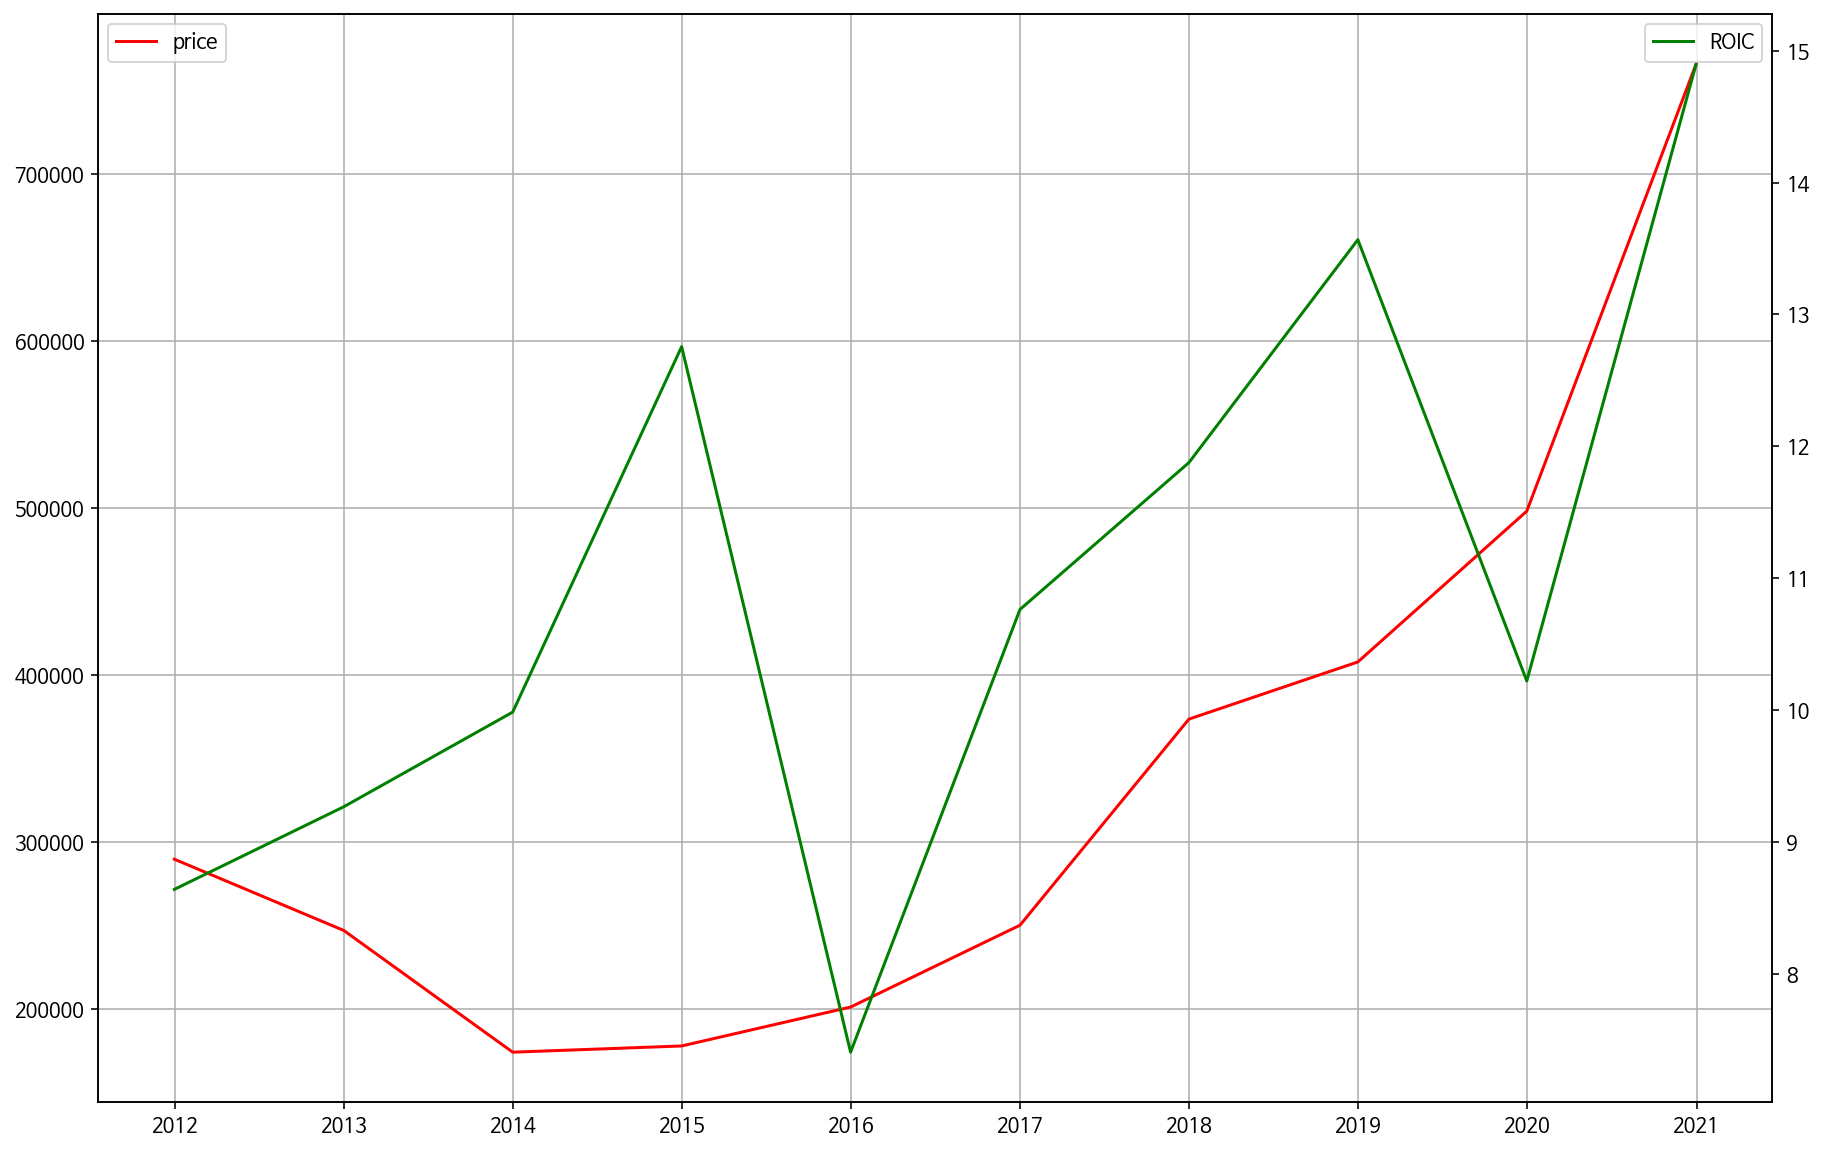

In [30]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
line1 = ax1.plot(df.index, df['year_price'], color = 'r', label='price')
line2 = ax2.plot(df.index, df['ROIC'], color = 'g', label='ROIC')


ax1.legend(loc = 2)
ax1.grid()
ax2.legend(loc = 1)
plt.show()

## 1차 결론 !!
## 유동비율이나 ROIC그래프가 주가 그래프 밑으로 내려갔을때 사면 재미있을까?
## 다른 종목들이랑도 비교를 해 봅시다!!

In [31]:
samsung = pd.read_csv('/content/drive/MyDrive/samsung_base.csv')
skhynix = pd.read_csv('/content/drive/MyDrive/skhynix_base.csv')
naver = pd.read_csv('/content/drive/MyDrive/naver_base.csv')
nexongt = pd.read_csv('/content/drive/MyDrive/nexongt_base.csv')

In [32]:

samsung.set_index('Date', inplace=True)
skhynix.set_index('Date', inplace=True)
naver.set_index('Date', inplace=True)
nexongt.set_index('Date', inplace=True)
samsung_corr = samsung.corr()
skhynix_corr = skhynix.corr()
naver_corr = naver.corr()
nexongt_corr = nexongt.corr()


## 일단 다른 종목들도 roic 와 연관도가 높은지 확인해 봅시다 !!

## 삼성전자 - 유동비율, 영업이익률

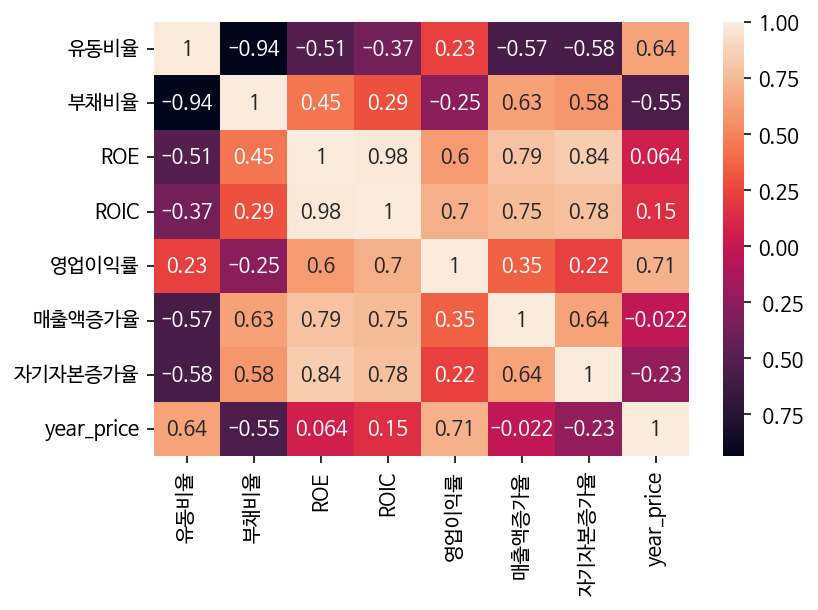

In [33]:
sns.heatmap(samsung_corr, annot=True)

## sk하이닉스 - 영업이익률

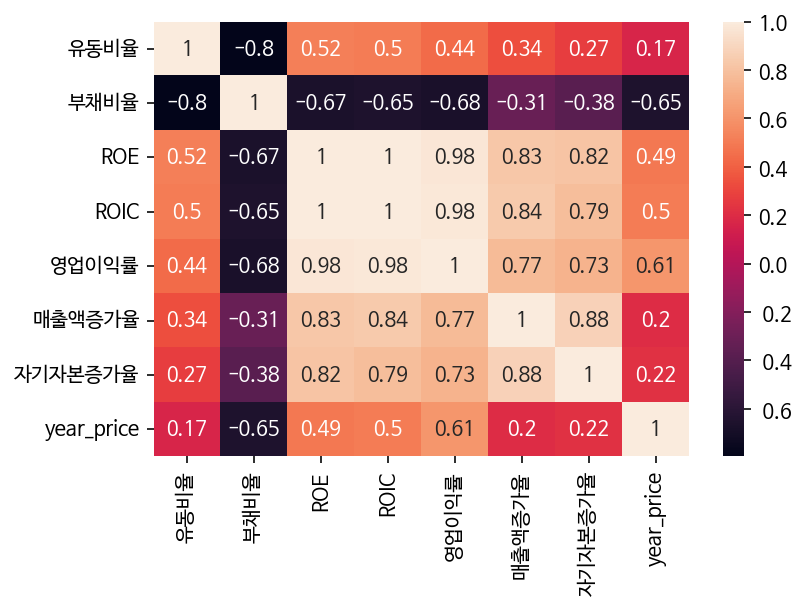

In [34]:
sns.heatmap(skhynix_corr, annot=True)

## 네이버 - ... 매출액증가율?

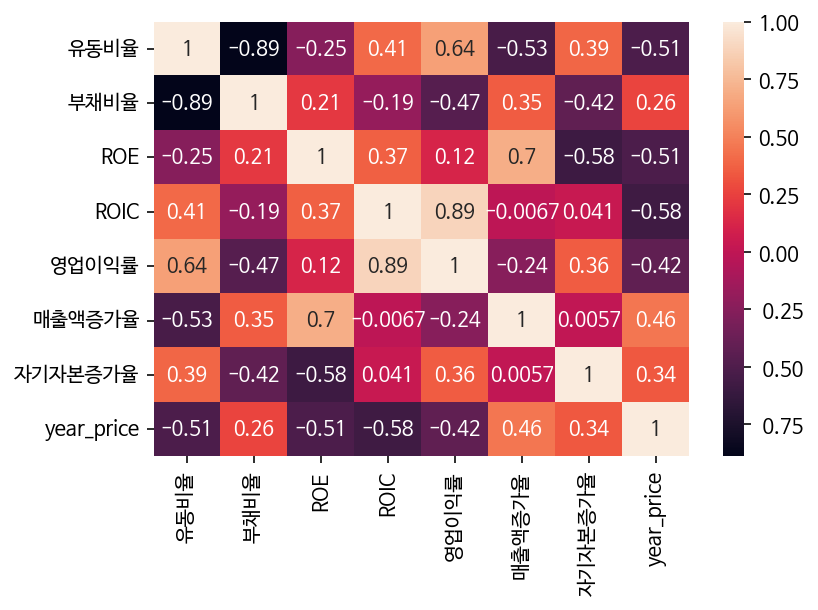

In [35]:
sns.heatmap(naver_corr, annot=True)

## 넥슨지티 - ... 부채비율?

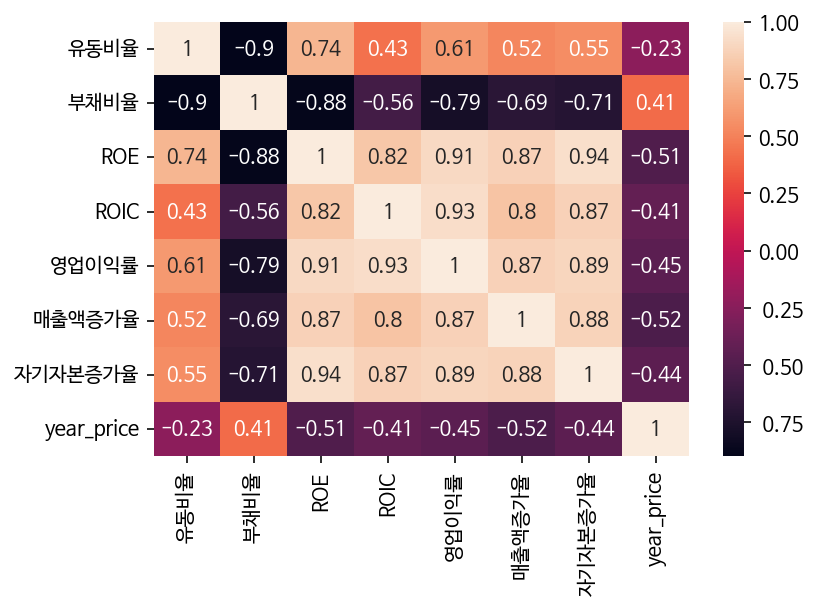

In [36]:
sns.heatmap(nexongt_corr, annot=True)

## 여러가지 기업들을 살펴보니 연관성이 제각각입니다

## 주가 흐름이 어떤지 살펴볼게요

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3186668990>],
      dtype=object)

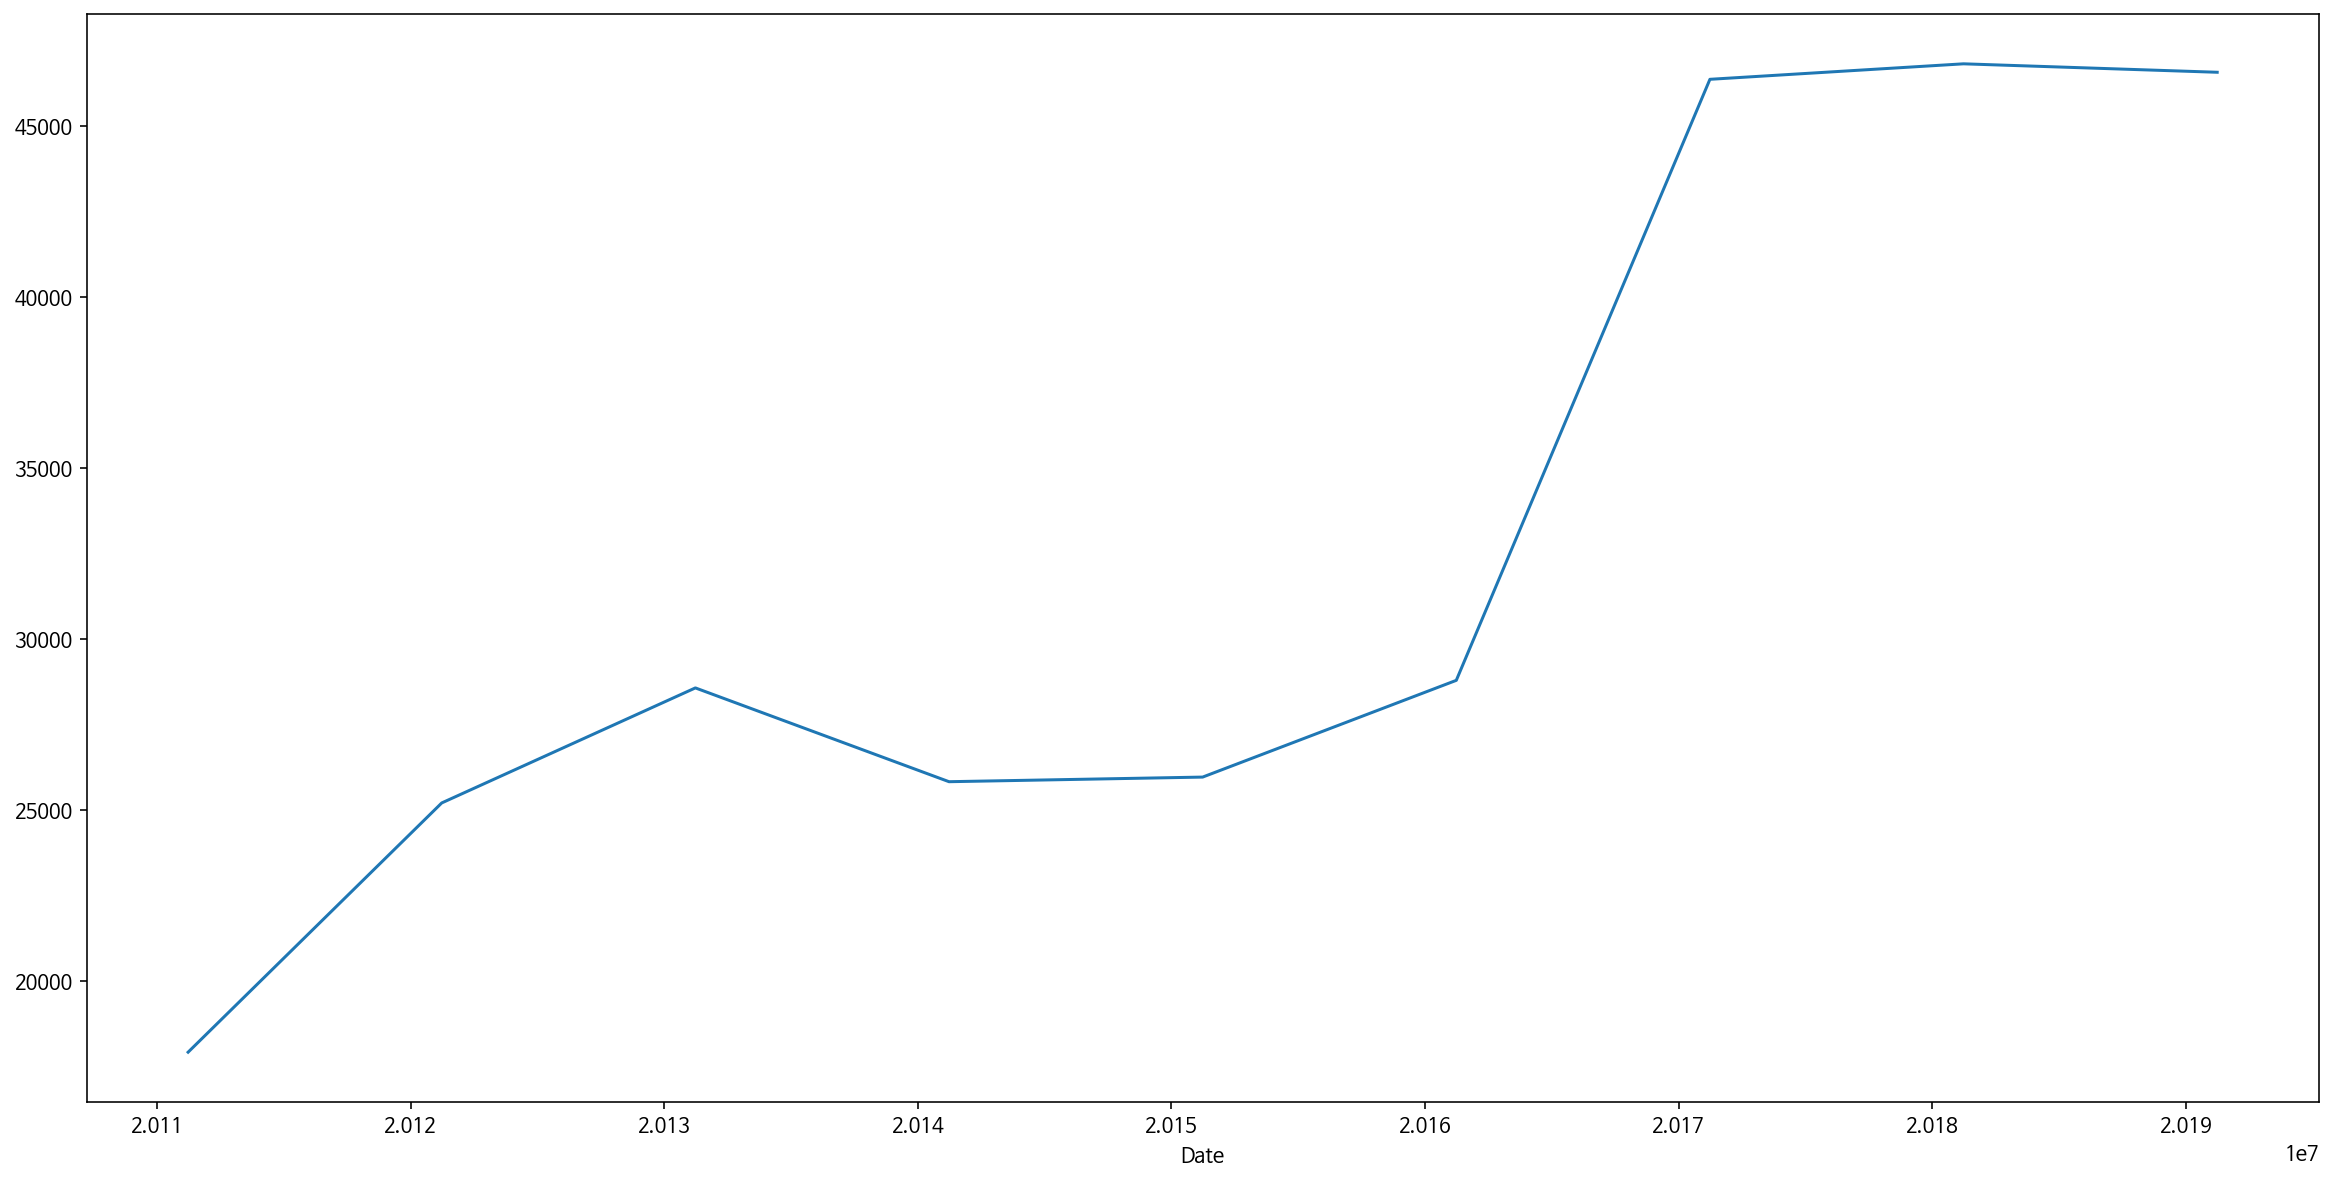

In [37]:
samsung['year_price'].plot(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3186e27d50>],
      dtype=object)

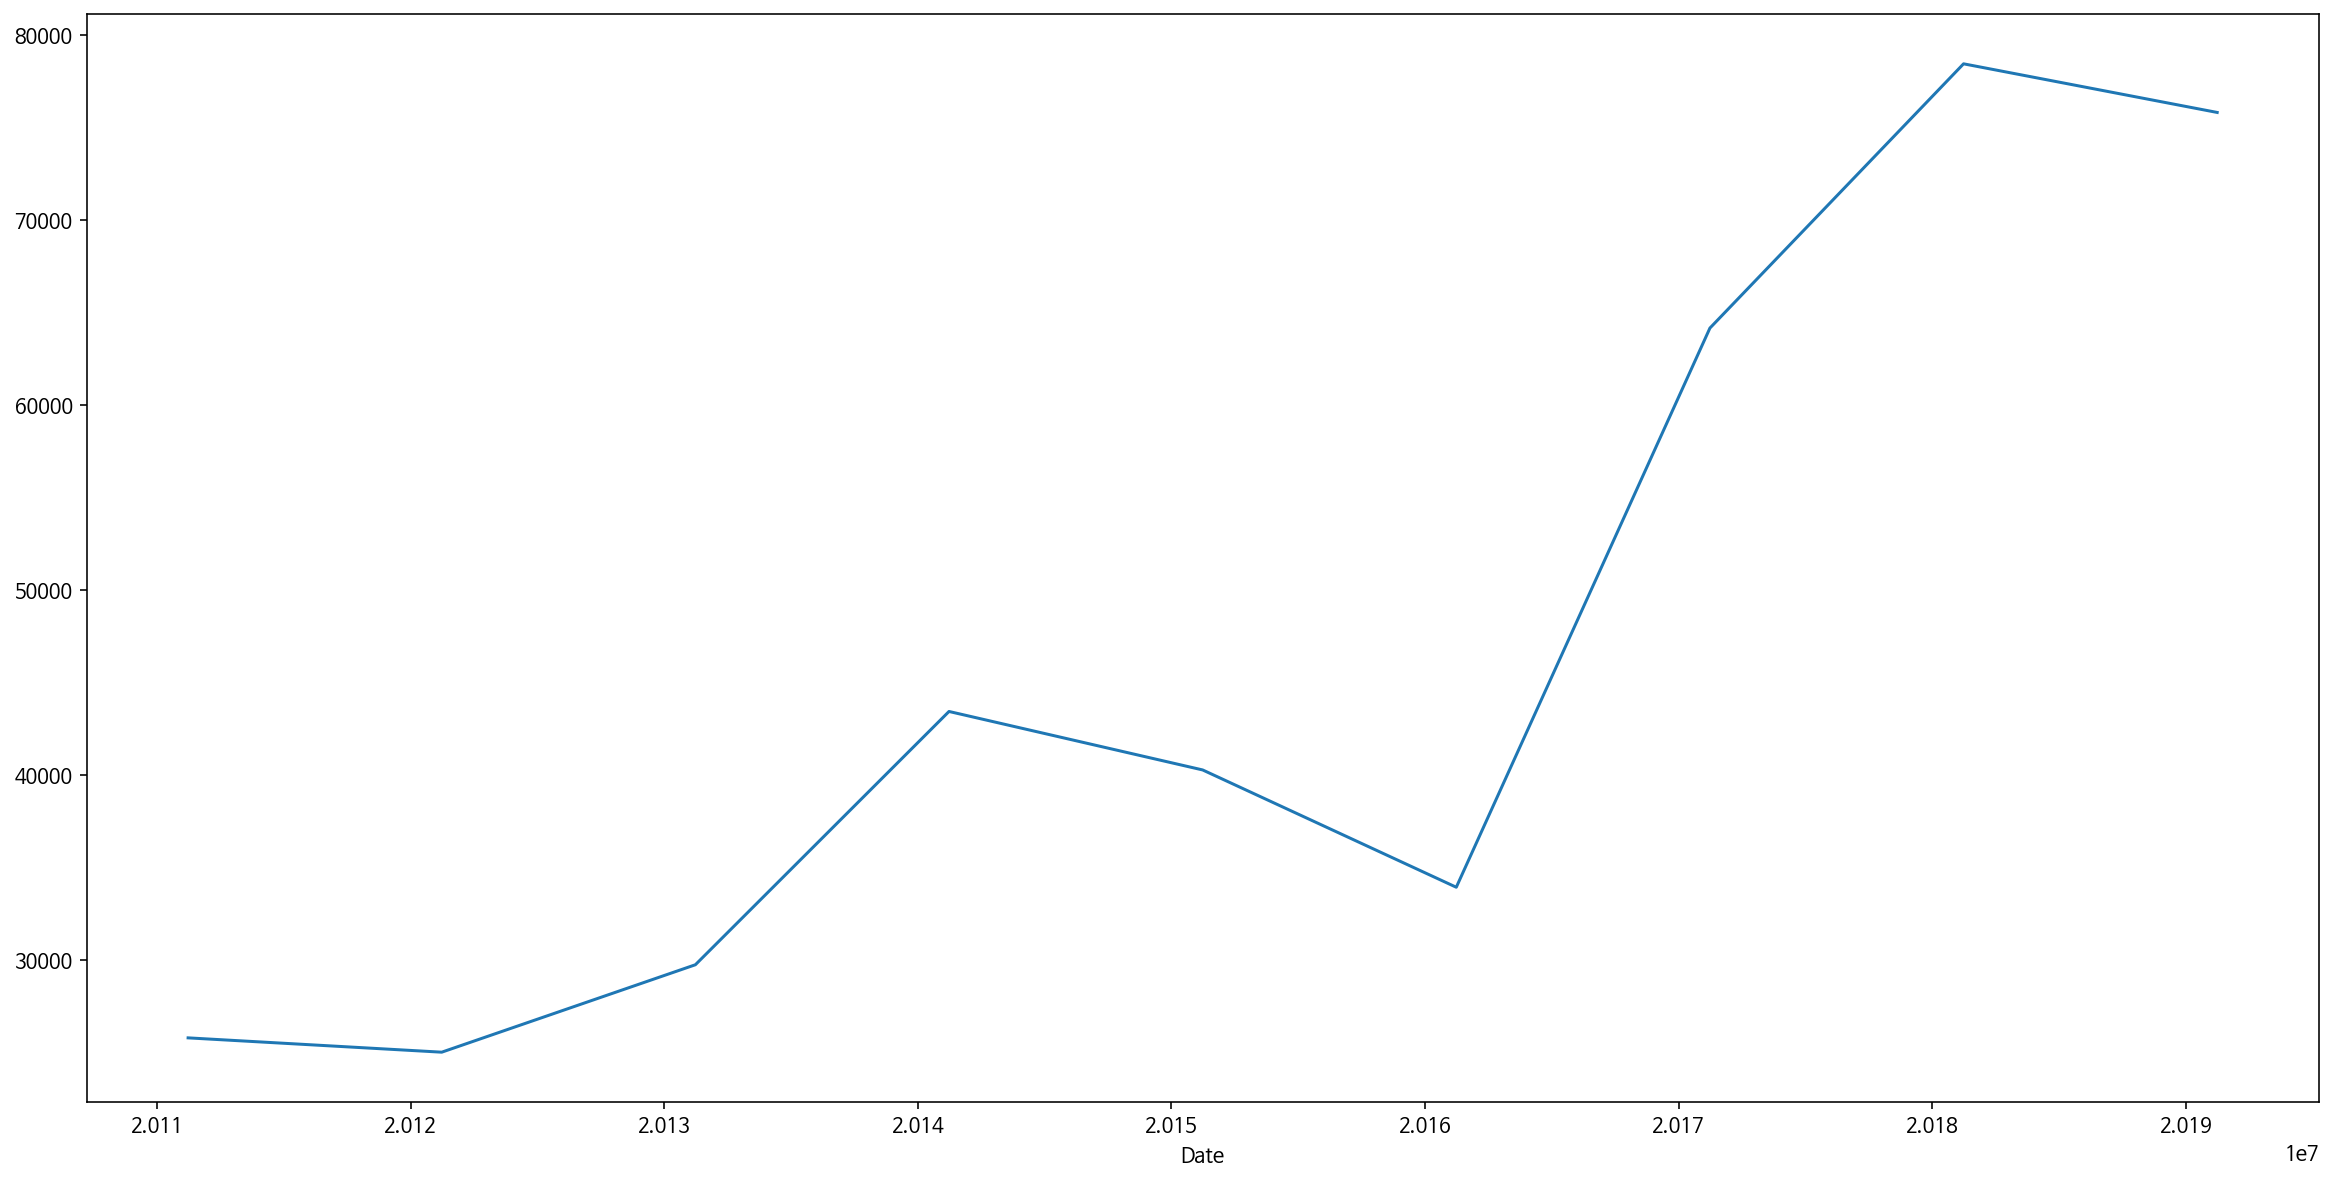

In [38]:
skhynix['year_price'].plot(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3186a08ed0>],
      dtype=object)

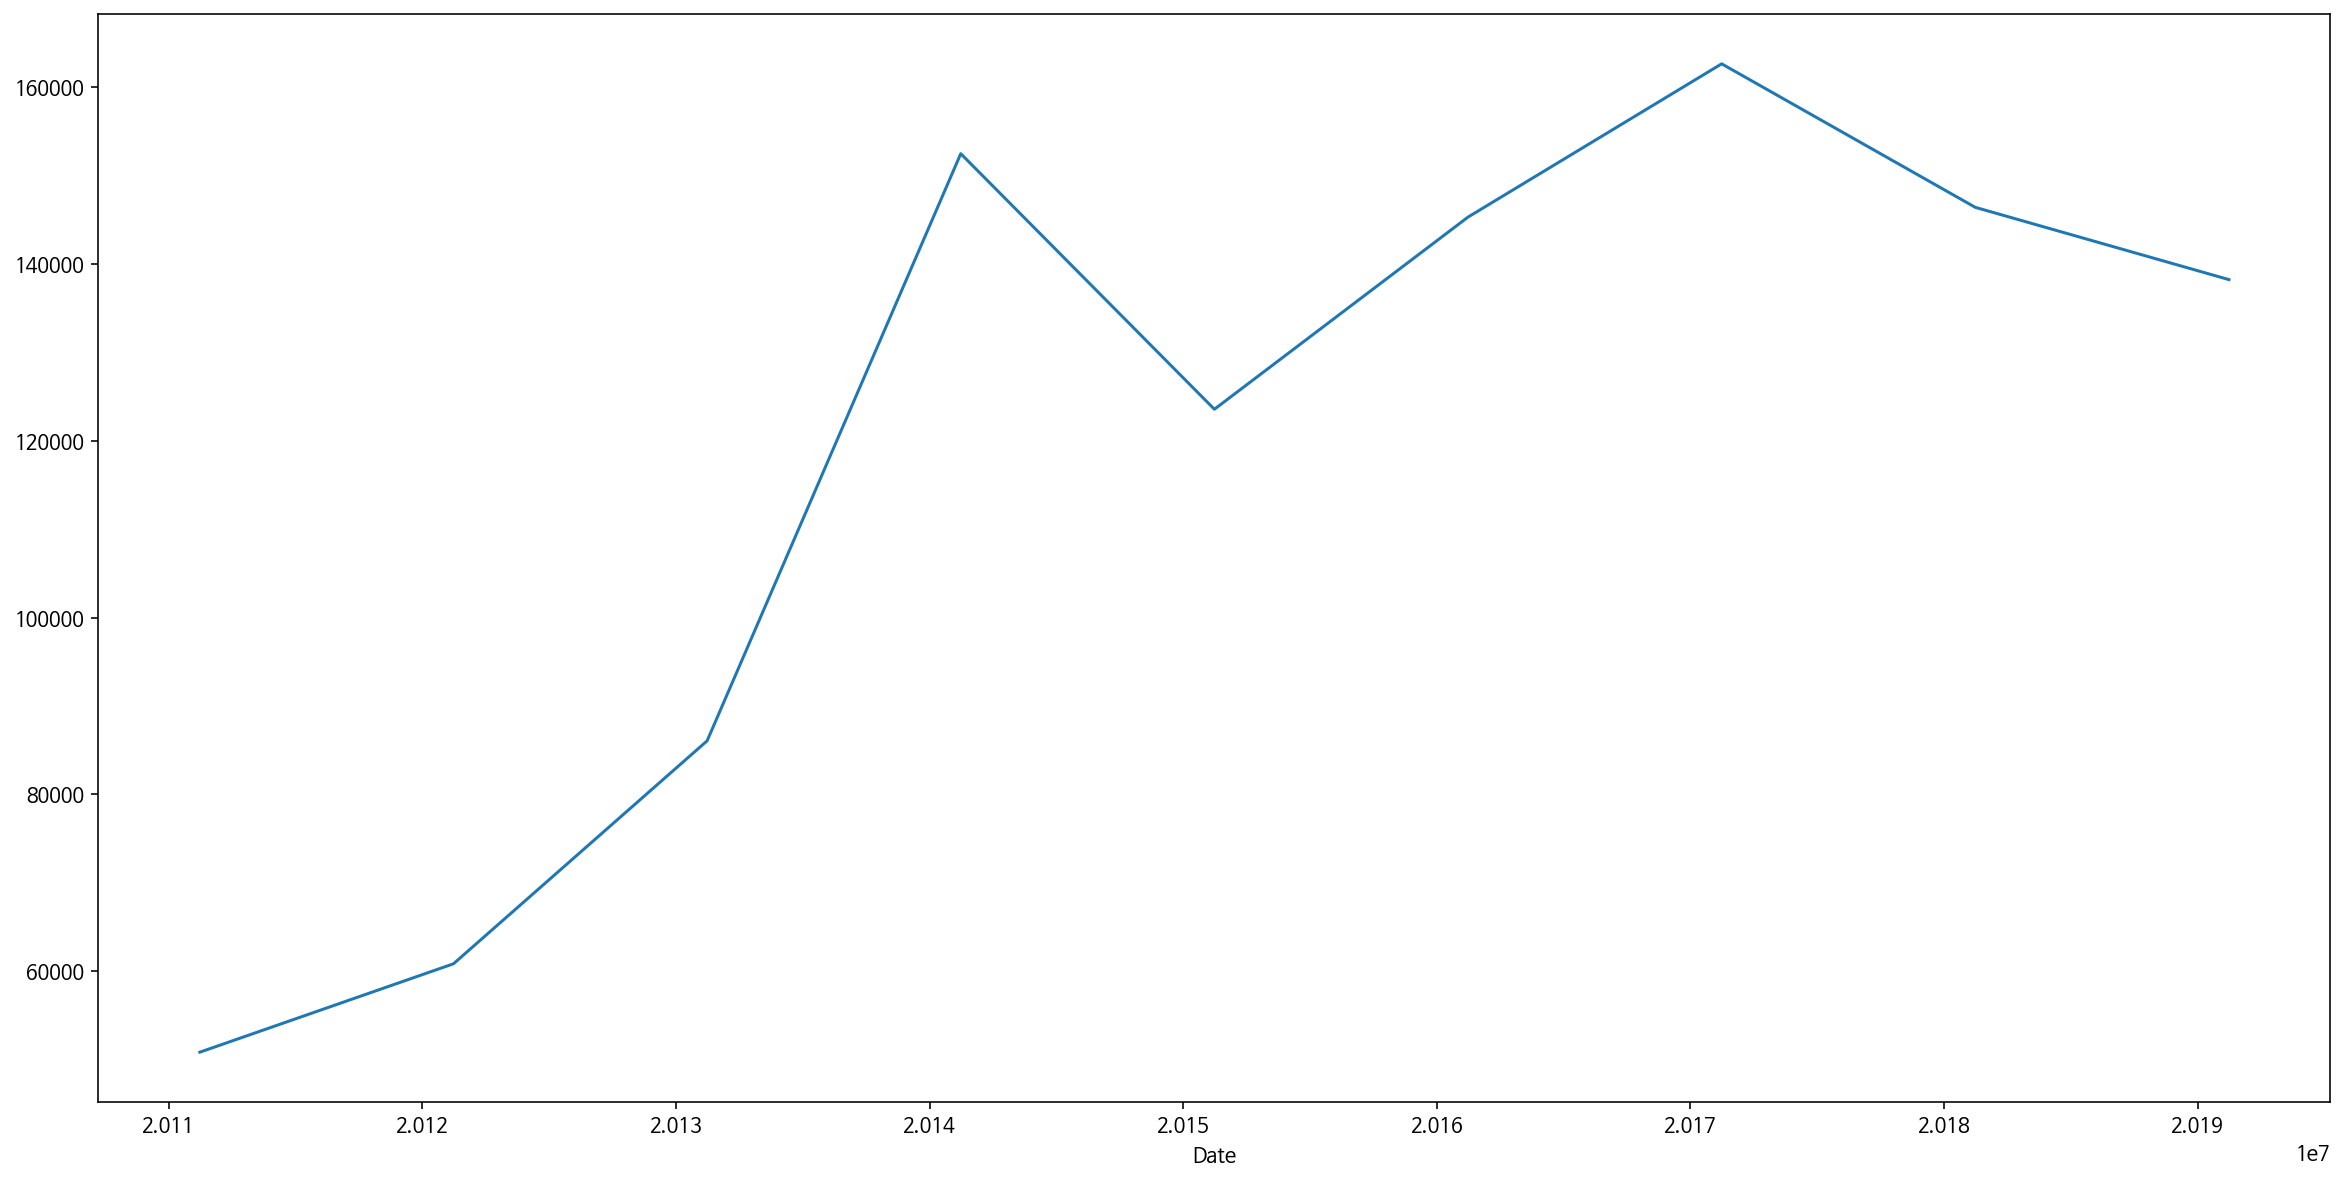

In [39]:
naver['year_price'].plot(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3186a38990>],
      dtype=object)

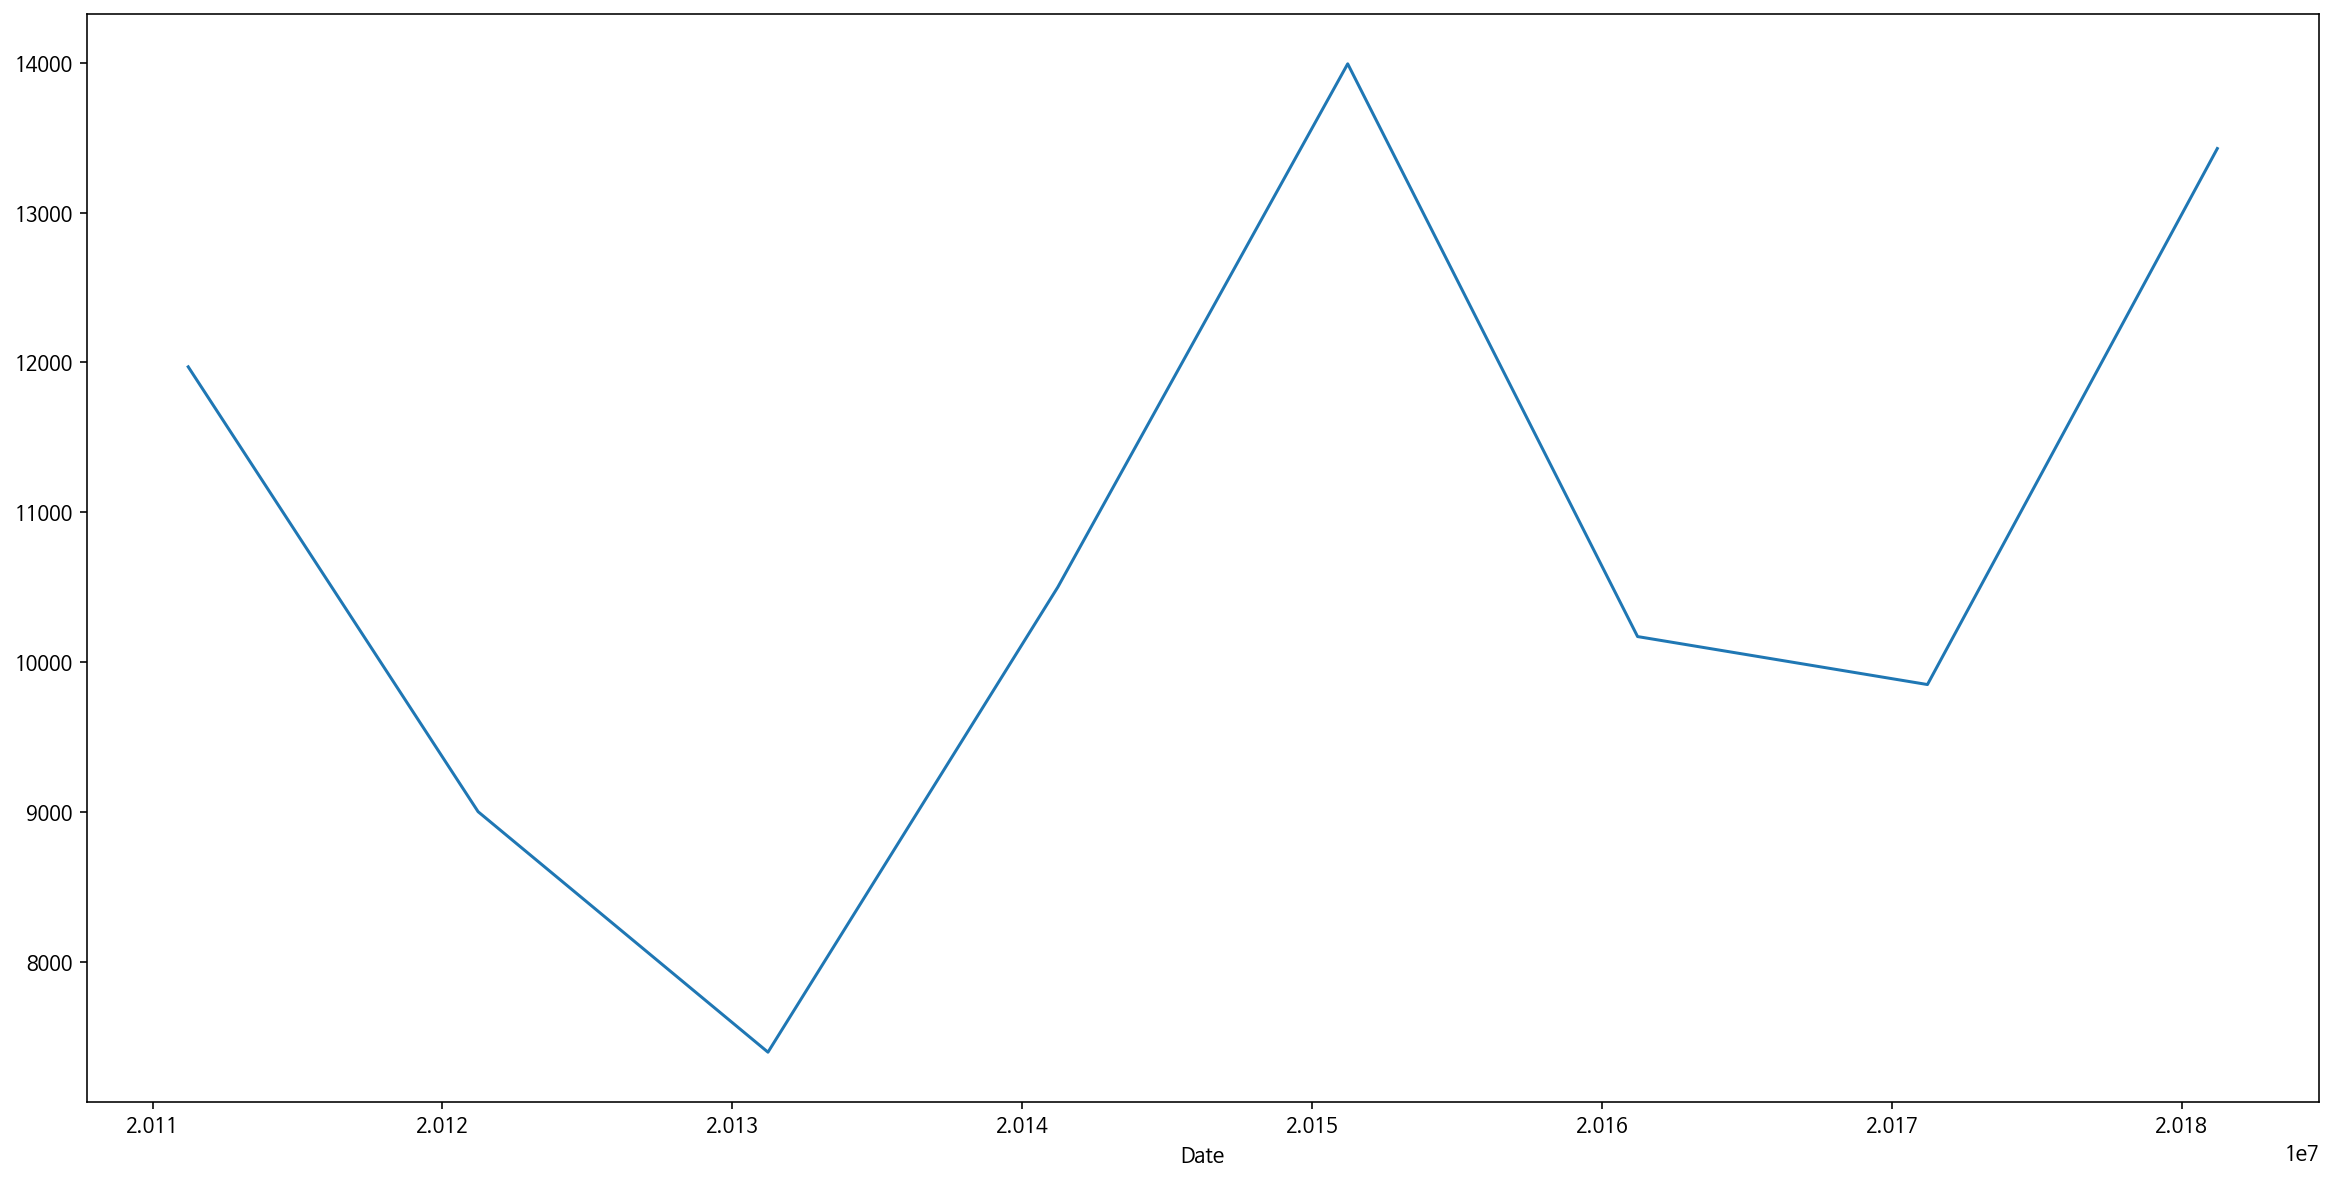

In [40]:
nexongt['year_price'].plot(subplots=True, figsize=(20, 10))

## 개별 지표 하나만으로 모든 종목을 설명하기는 어려워 보입니다

In [52]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2020, 12, 31)

kospi = web.DataReader("^KS11", "yahoo", start=start, end=end)
kosdak = web.DataReader("^KQ11", "yahoo", start=start, end=end)
dow = web.DataReader("^DJI", "yahoo", start=start, end=end)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f318654e950>],
      dtype=object)

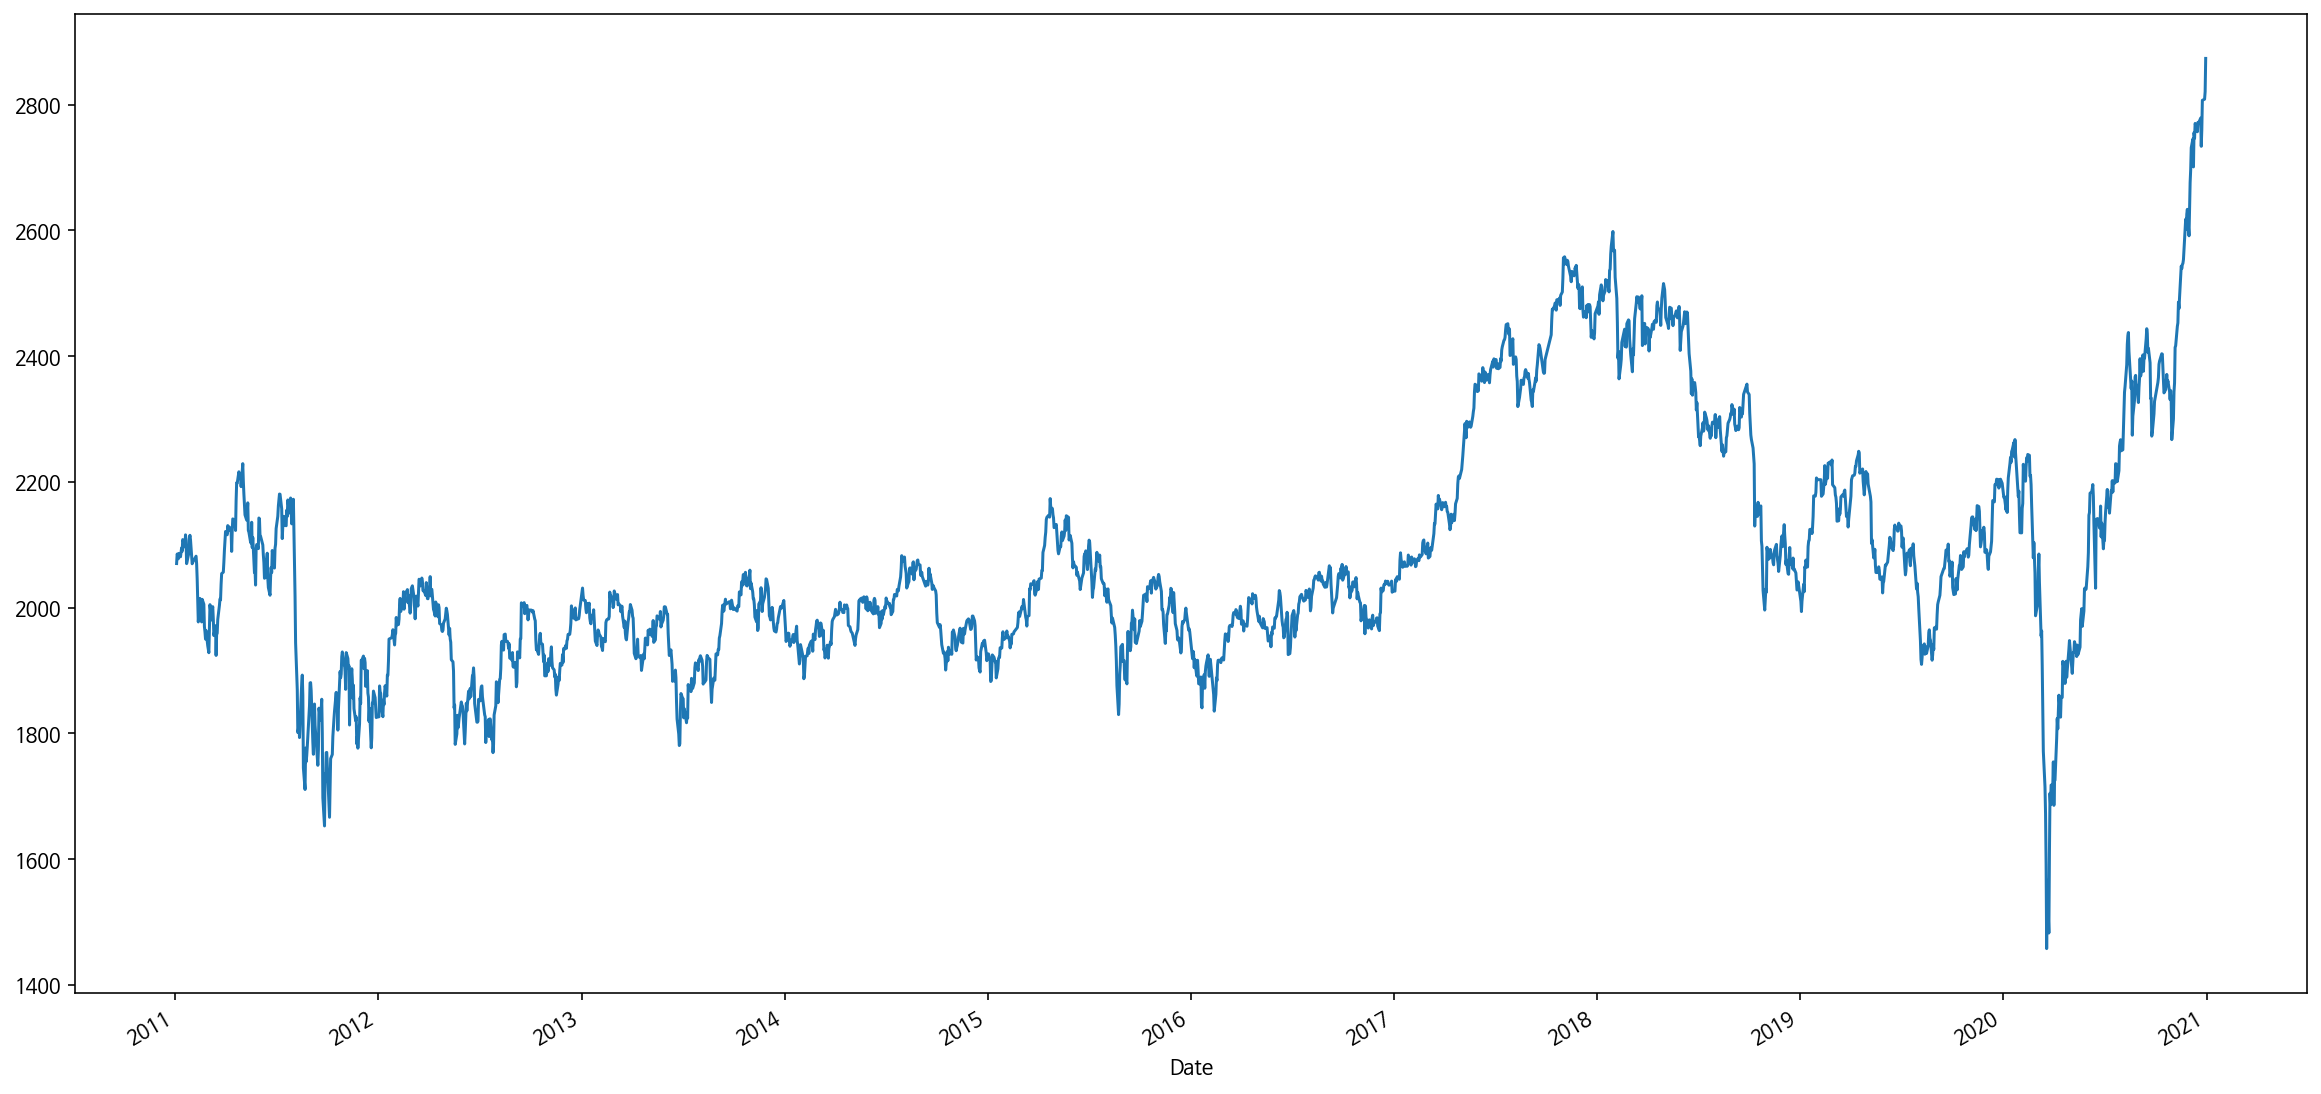

In [51]:
kospi['Close'].plot(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f318618ebd0>],
      dtype=object)

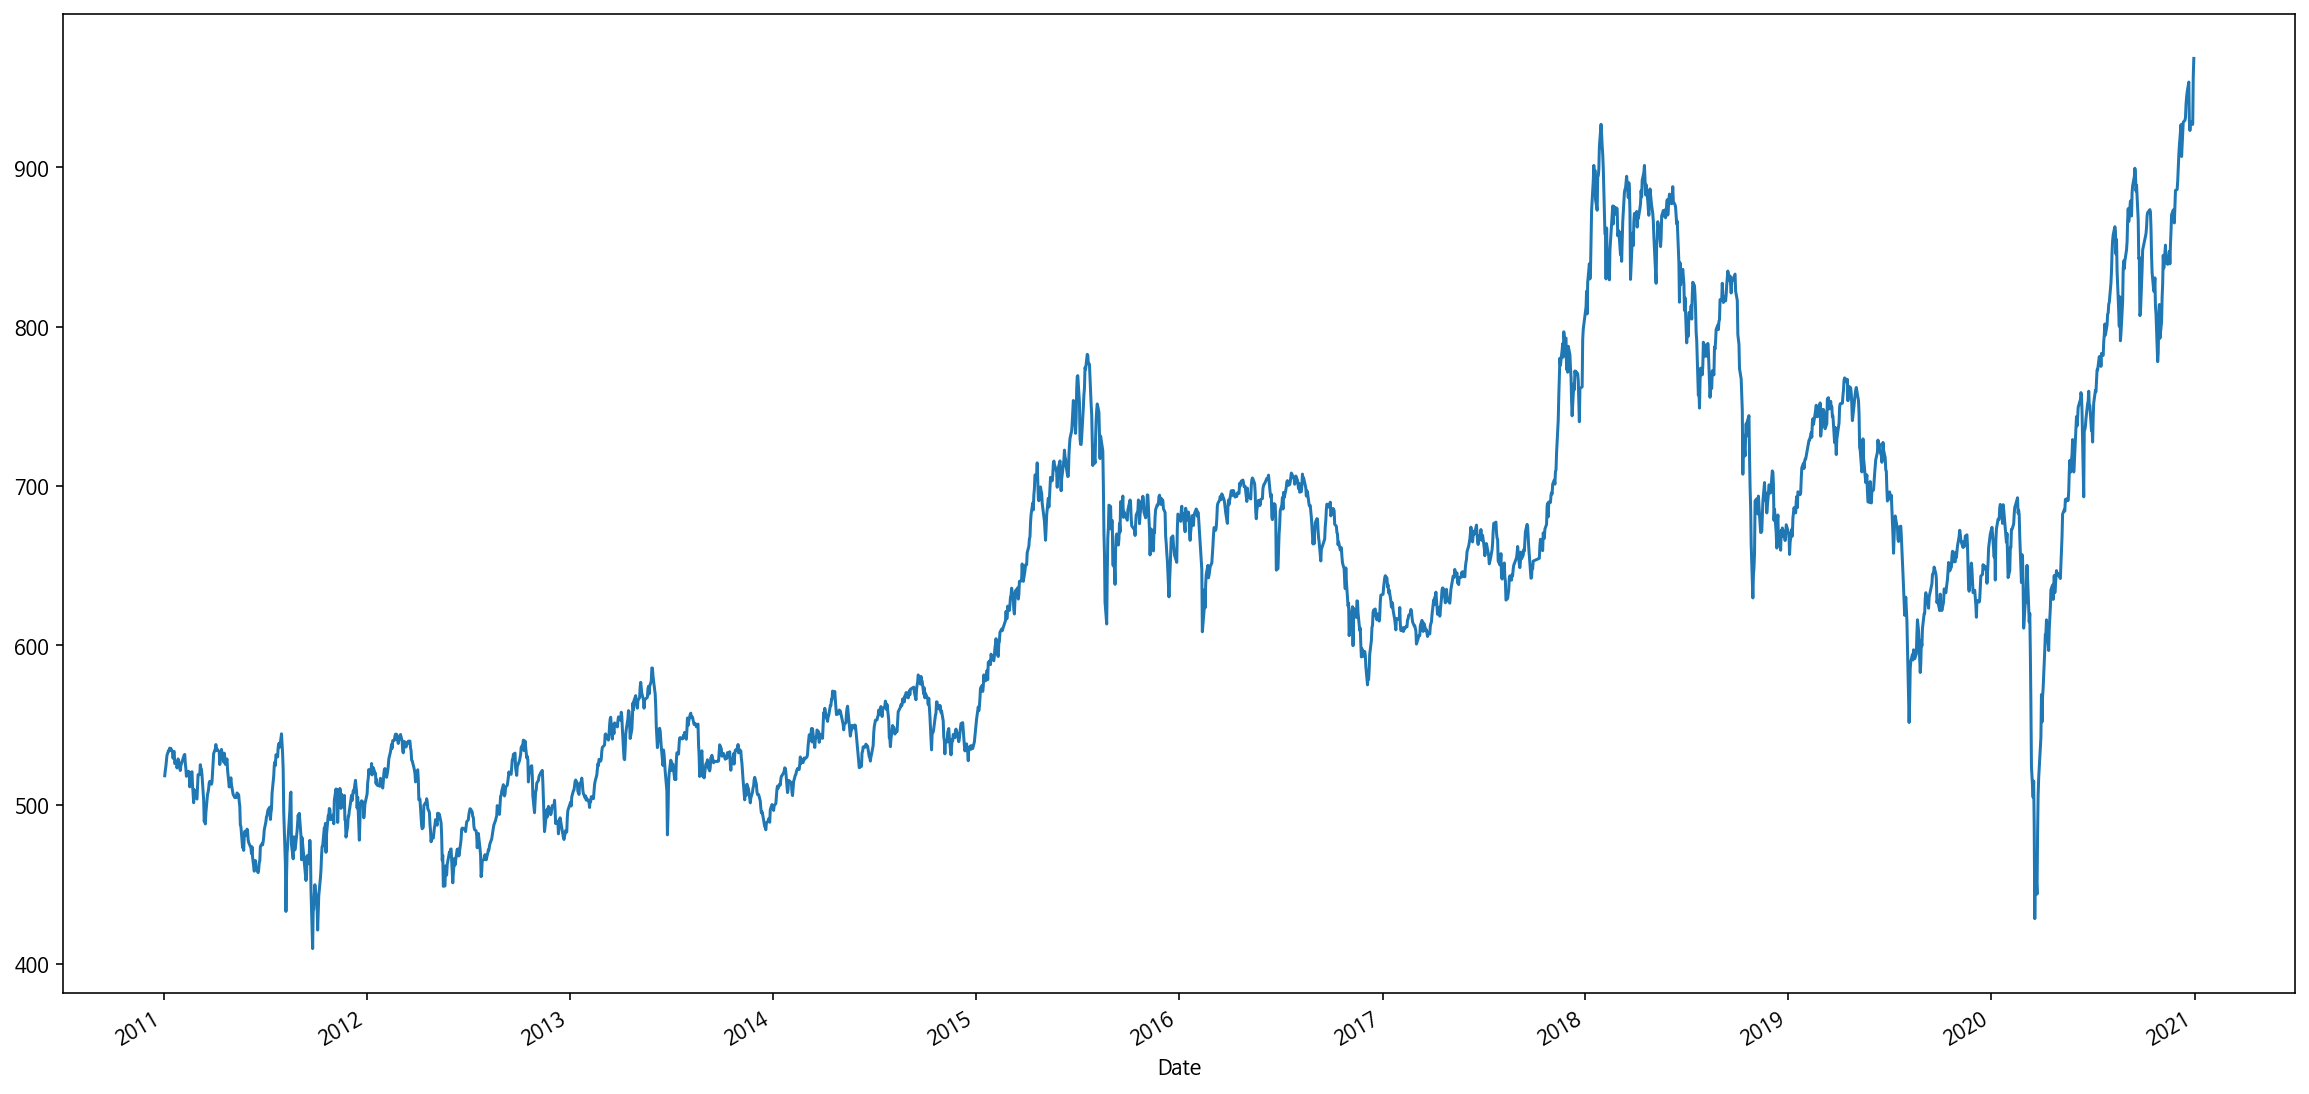

In [53]:
kosdak['Close'].plot(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3185fac650>],
      dtype=object)

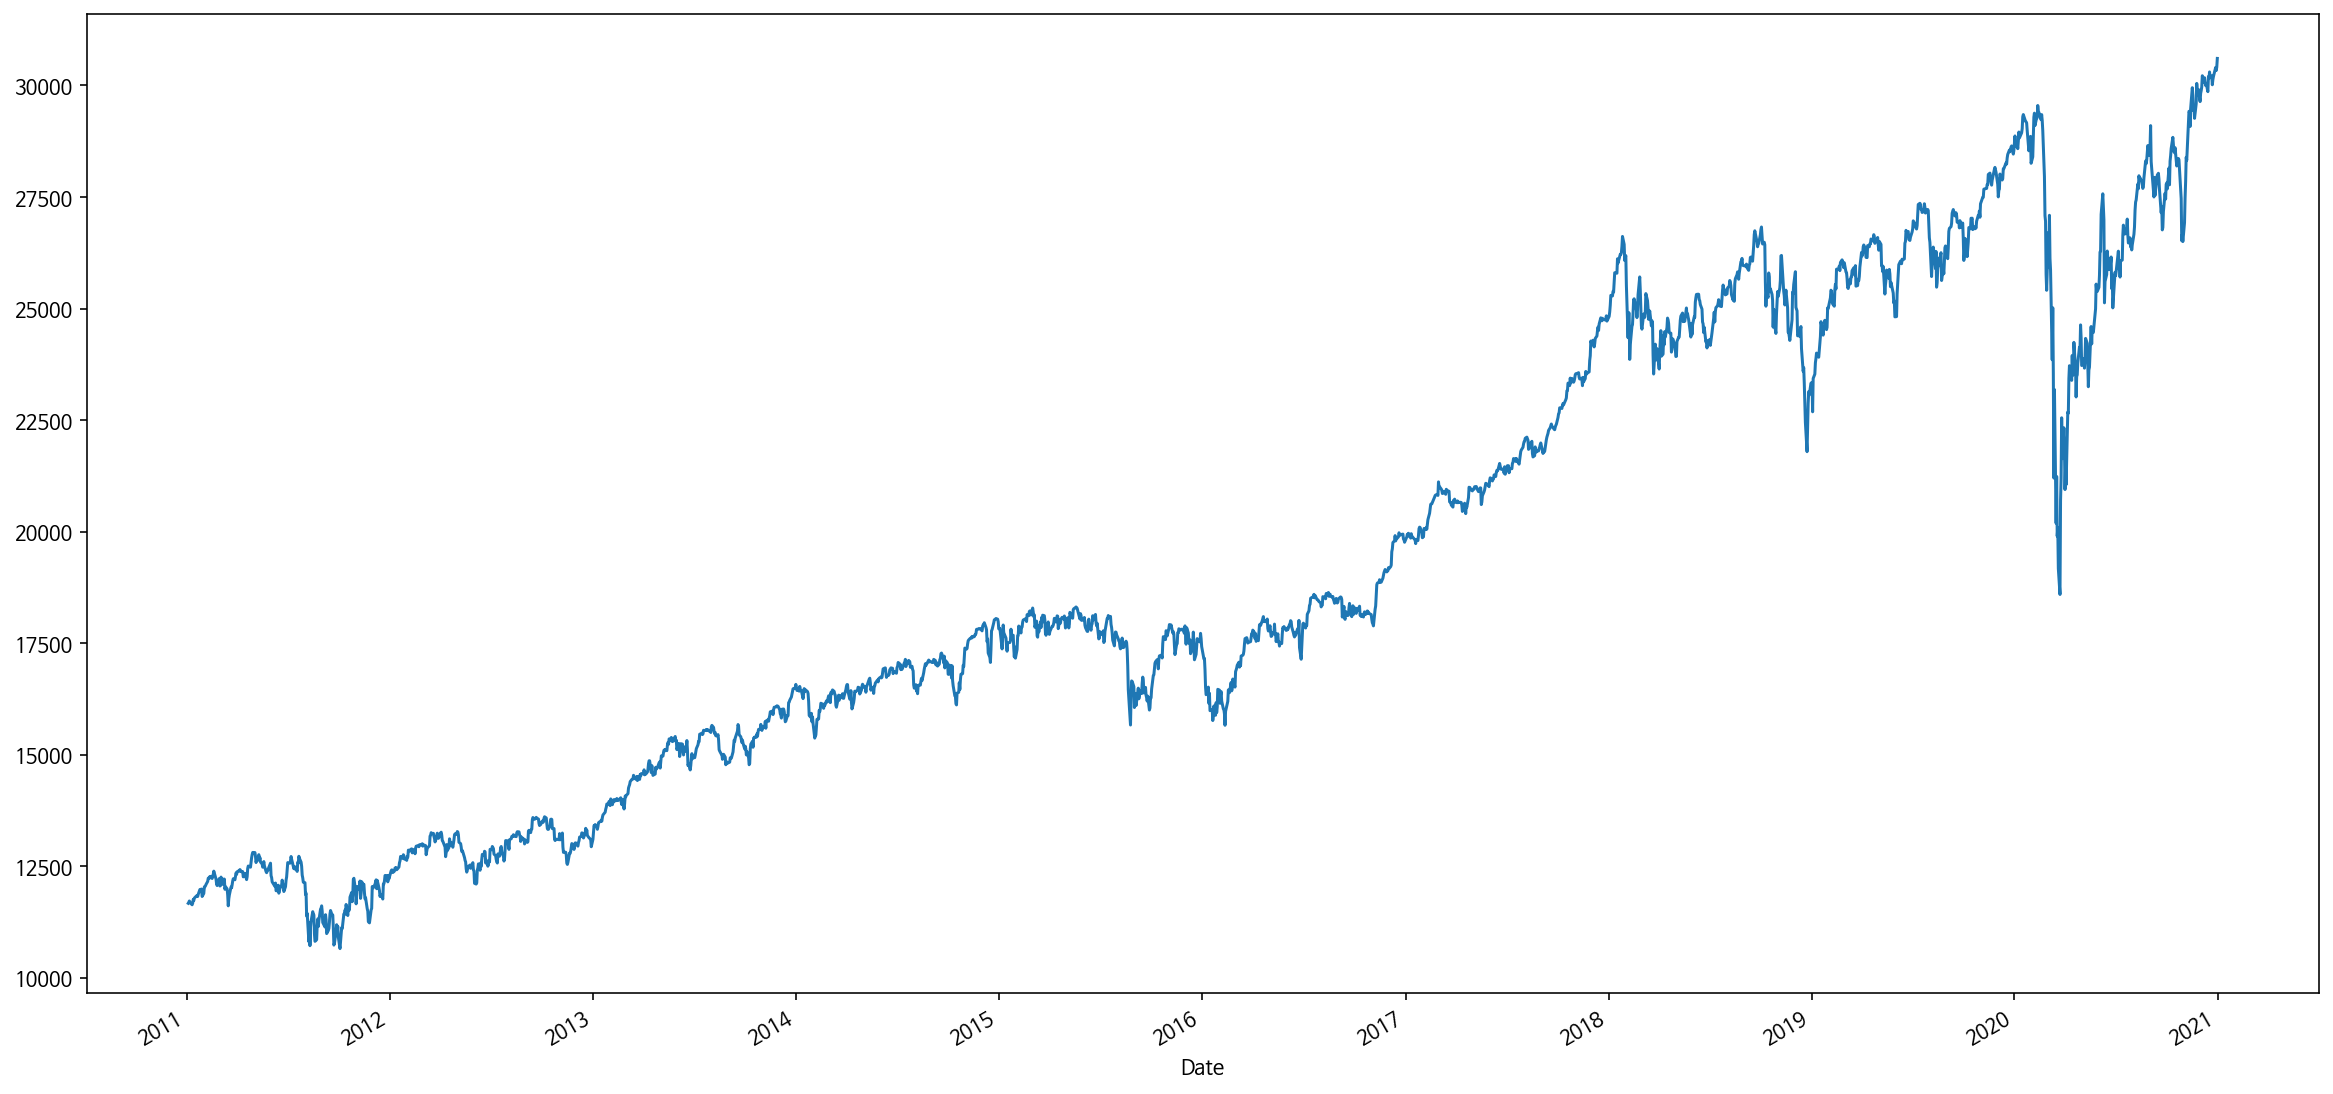

In [54]:
dow['Close'].plot(subplots=True, figsize=(20, 10))

## 결론 !! 주가 흐름을 예상하기 어려움 !!